# Ad Hoc Analysis | ITMGT 25.03 LT1
*Created by Toni Claire S. David*

---

To form an analysis regarding the data, the following were done:
- [x] Import the json into a dataframe
- [x] Extract relevant information for the analysis
    - [x] age/age group
    - [x] month of transaction
    - [x] individual list of items sold
    - [x] revenue from items sold
- [x] Configure into tables and charts the following:
    - [x] items sold per month
    - [x] revenue per item per month
    - [x] age group and sex of unique users (for market research)
    - [x] repeaters, inactive customers, and engaged customers

Thank you!

## Import the json into a data frame and initializing all functions used

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#initialize for extraction of months
from datetime import datetime, date

#initialize to make graphs look better src: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
plt.rcParams["figure.figsize"] = [10, 6]
%config InlineBackend.figure_format = 'retina'

#import data into dataframe and then into variable
with open('transaction-data-adhoc-analysis.json','r') as f:
        data = json.load(f)
transaction_df = pd.DataFrame(data)

## Extract relevant information for Analysis

### Extract Age and Age Group into the main data frame (transactions_df)

In [2]:
# creating a function that computes for age by subtracting today from birthdate

# converts str birthdate into manageable data and subtracts from date today to get age src: https://www.geeksforgeeks.org/convert-birth-date-to-age-in-pandas/
def age(born):
    born = datetime.strptime(born, "%Y/%m/%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
transaction_df['age group'] = transaction_df['birthdate'].apply(age)

In [3]:
# creating a function that sections the age into age groups for convenient analysis

# groups ages into age groups using if else statements src: https://github.com/jilagan/ITMGT25.03_Intersession2020/blob/master/Introduction%20to%20Pandas.ipynb
def age_group(age):
    if age > 64:
        return "Over 64"
    elif age >= 55:
        return "55-64"
    elif age >= 45:
        return "45-54"
    elif age >= 35:
        return "35-44"
    elif age >= 25:
        return "25-34"
    elif age >= 18:
        return "18-24"
    else:
        return "Under 18"

transaction_df['age group'] = transaction_df["age group"].apply(age_group)

# initializing the list for age groups for future references
age_groups_list = sorted(list(transaction_df['age group'].unique()))

### Extract Month of Transaction into the main data frame (transactions_df)

In [4]:
# creating a new column for the month

#extracting month using pandas functions src: https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/
transaction_df['month'] = pd.to_datetime(transaction_df['transaction_date']).dt.month

### Extract Individual Items Sold into the main data frame (transactions_df)

In [5]:
# initializing lists for convenience

items_list = ["Exotic Extras,Beef Chicharon","Exotic Extras,Kimchi and Seaweed",
             "Candy City,Orange Beans","Candy City,Gummy Worms",
             "HealthyKid 3+,Gummy Vitamins","HealthyKid 3+,Yummy Vegetables","HealthyKid 3+,Nutrional Milk"]
price_list = [1299,799,199,150,1500,500,1990]
brands_list = ["Exotic Extras","Candy City","HealthyKid 3+"]
month_list = ['Jan','Feb','Mar','Apr','May','Jun']

In [6]:
# creating a function that looks for individual items in transaction_items and returning their quantity

# identifies whether order contains specific item using .find() and extracts quantity of item bought src: https://www.geeksforgeeks.org/python-string-find/
def return_quantity(transaction_items,item):
    if transaction_items.find(item) > -1:
        item_line = transaction_items.find(item)
        quantity = transaction_items[item_line + len(item+",(x")]
        return int(quantity)
    return 0

In [7]:
# creating new columns for each item and inputing the quantity purchased using the function created above

for count in range(len(items_list)):
    transaction_df[items_list[count]]=transaction_df["transaction_items"].apply(return_quantity, item = items_list[count])
    count += 1

### Re-ordering the DataBase

In [8]:
transaction_df = transaction_df.iloc[:,[5,3,2,1,9,4,0,6,7,8,10,11,12,13,14,15,16,17]]
transaction_df

,username,name,mail,birthdate,age group,sex,address,transaction_items,transaction_value,transaction_date,month,"Exotic Extras,Beef Chicharon","Exotic Extras,Kimchi and Seaweed","Candy City,Orange Beans","Candy City,Gummy Worms","HealthyKid 3+,Gummy Vitamins","HealthyKid 3+,Yummy Vegetables","HealthyKid 3+,Nutrional Milk"
0,veronicawells,Jennifer Campbell,watsonbrenda@gmail.com,1926/03/11,Over 64,F,USNS Wagner\nFPO AE 00917,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,4,0,0,0,0,0,0
1,cgilbert,Melissa Kim,moorelisa@gmail.com,2016/07/08,Under 18,F,USCGC Benson\nFPO AP 48794,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1,3,0,1,0,0,0,4
2,cgilbert,Melissa Kim,moorelisa@gmail.com,2016/07/08,Under 18,F,USCGC Benson\nFPO AP 48794,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1,0,0,0,0,3,2,0
3,cgilbert,Melissa Kim,moorelisa@gmail.com,2016/07/08,Under 18,F,USCGC Benson\nFPO AP 48794,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,0,0,0,0,0,1,0
4,qhernandez,Kristen Cooper,michael78@yahoo.com,1949/09/27,Over 64,F,"33911 Hansen Loaf\nWest Sandra, ND 54188","Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1,0,0,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,kmcconnell,Tammy Byrd,christina55@hotmail.com,2019/10/26,Under 18,F,"96081 Harrison Brooks\nJenniferbury, MA 02124","Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,6,0,2,0,0,0,0,1
83032,llowe,Donald Andersen,melvinschmidt@hotmail.com,1913/11/04,Over 64,M,428 Kristopher Curve Apt. 206\nMcculloughville...,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,6,0,1,4,0,0,1,0
83033,llowe,Donald Andersen,melvinschmidt@hotmail.com,1913/11/04,Over 64,M,428 Kristopher Curve Apt. 206\nMcculloughville...,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,6,0,0,4,4,0,4,0
83034,llowe,Donald Andersen,melvinschmidt@hotmail.com,1913/11/04,Over 64,M,428 Kristopher Curve Apt. 206\nMcculloughville...,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,6,0,0,0,2,0,0,2


## Configuring Tables and Charts for the Data Gathered

### Breakdown of Items Sold Per Month

In [9]:
# Creating a new DataFrame (item_per_month) using groupby ~ removing the row 'month' to show the data accurately in the graphs ~

# groupby src: https://github.com/jilagan/ITMGT25.03_Intersession2020/blob/master/Introduction%20to%20Pandas.ipynb
# set_axis src: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_axis.html
# conditional formatting src: https://www.geeksforgeeks.org/highlight-the-maximum-value-in-each-column-in-pandas/
# table style src: https://stackoverflow.com/questions/69021403/how-to-add-a-border-to-column-headers-and-caption-to-pandas-dataframe-using-sty

item_per_month = transaction_df.groupby('month')[items_list].sum().set_axis(month_list, axis='rows')
item_per_month.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Items Sold Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Jan,Feb,Mar,Apr,May,Jun
"Exotic Extras,Beef Chicharon",9665,10001,9816,9890,10028,9902
"Exotic Extras,Kimchi and Seaweed",9676,9949,9967,9921,9773,10104
"Candy City,Orange Beans",9774,10037,9611,9914,9964,10106
"Candy City,Gummy Worms",9559,9996,9986,10043,9801,9934
"HealthyKid 3+,Gummy Vitamins",9681,9980,10145,9842,9948,9980
"HealthyKid 3+,Yummy Vegetables",9959,10256,9896,9861,9735,9722
"HealthyKid 3+,Nutrional Milk",9727,9691,9876,9786,9881,9767


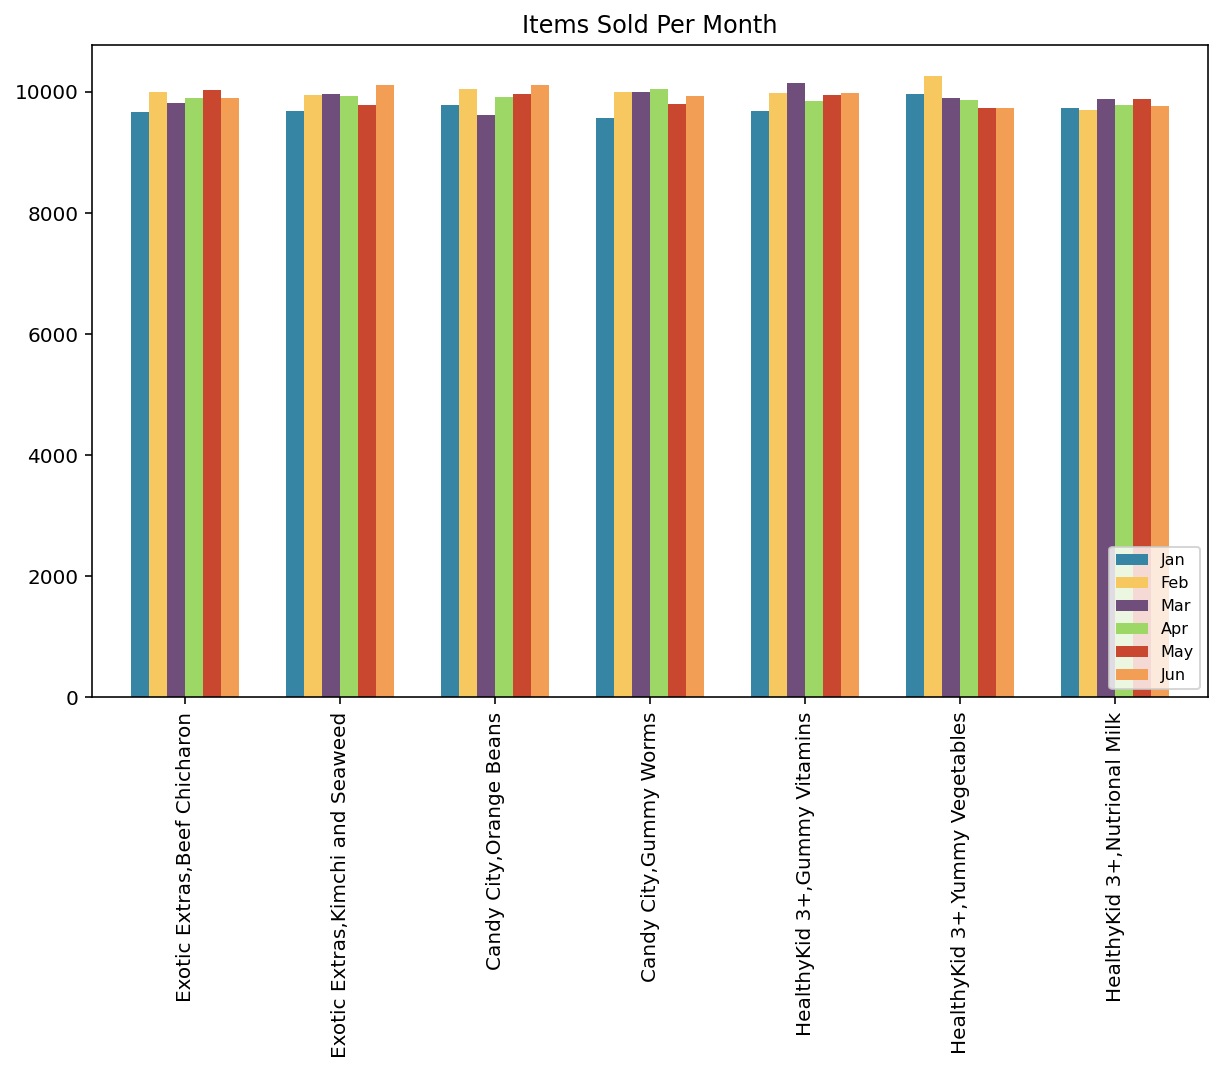

In [10]:
# Bar Graph of all Items Sold Per Month to show relevant trends

colors_list = ["#3785A5","#F6C85F","#6F4E7C","#9DD866","#CA472F","#F29E54","#8DDDD0"]

# .plot.bar src: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# .legend src: https://www.geeksforgeeks.org/change-the-legend-position-in-matplotlib/
# chart formatting src: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

item_per_month.T.plot.bar(width=0.7,color=colors_list)
plt.title("Items Sold Per Month")
plt.legend(loc='lower right',prop={'size': 8})
plt.show()

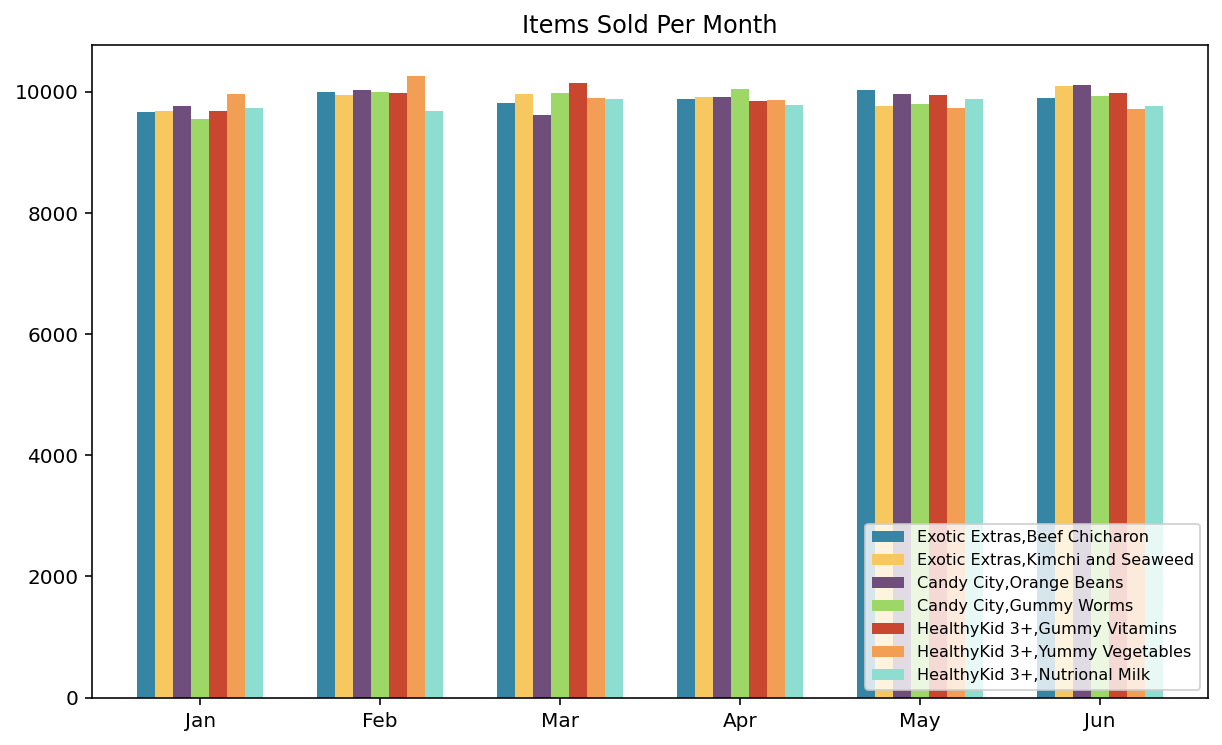

In [11]:
item_per_month.plot.bar(rot=0,width=0.7,color=colors_list)
plt.title("Items Sold Per Month")
plt.legend(loc='lower right',prop={'size': 8})
plt.show()

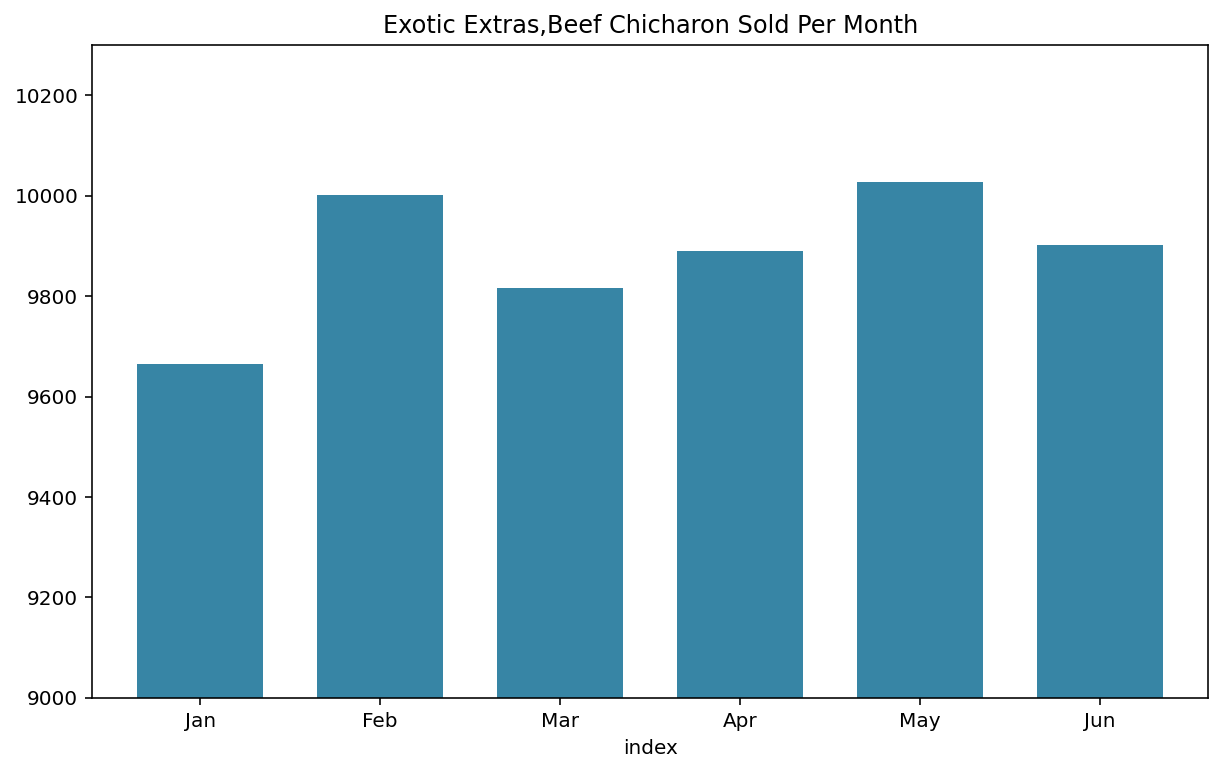

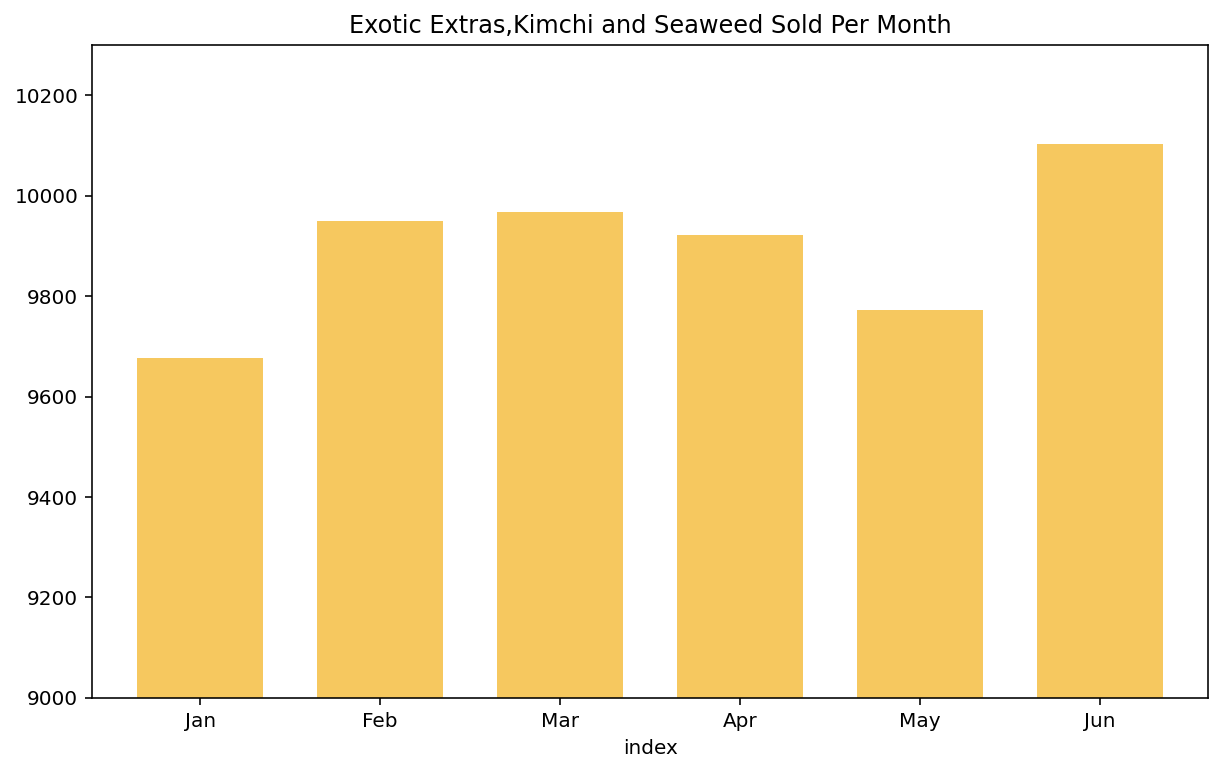

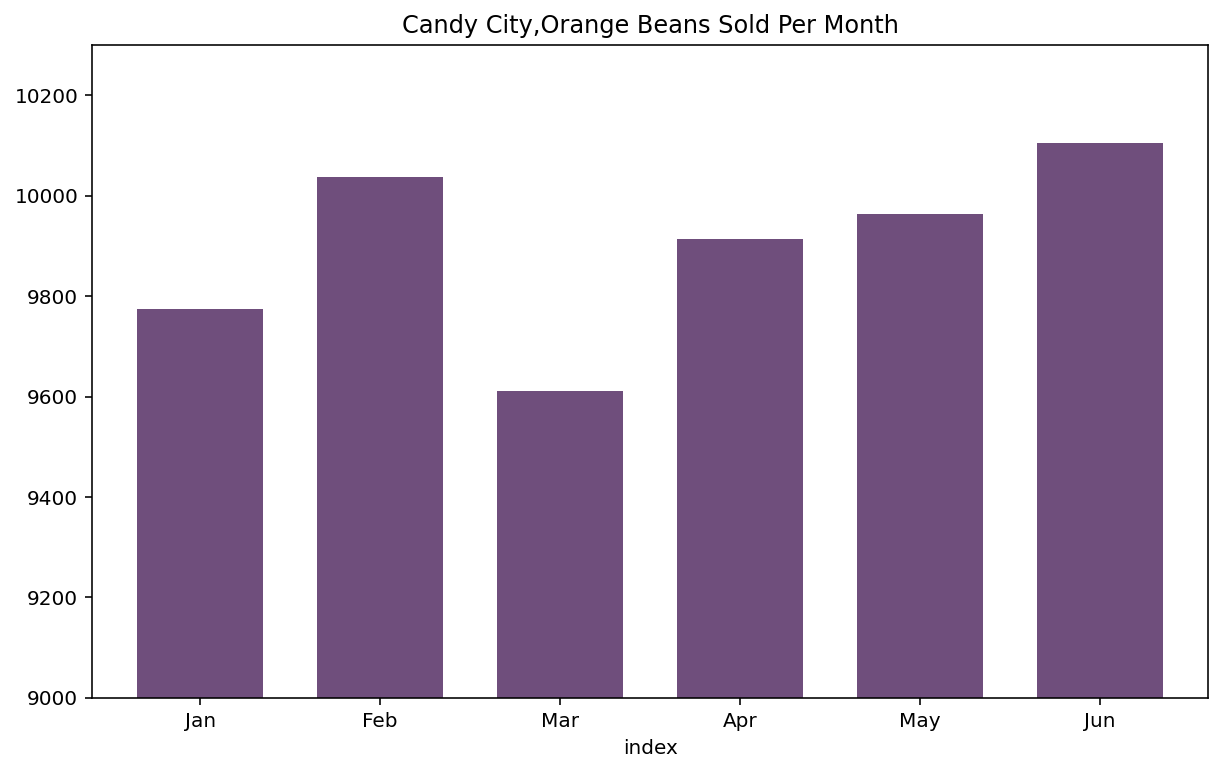

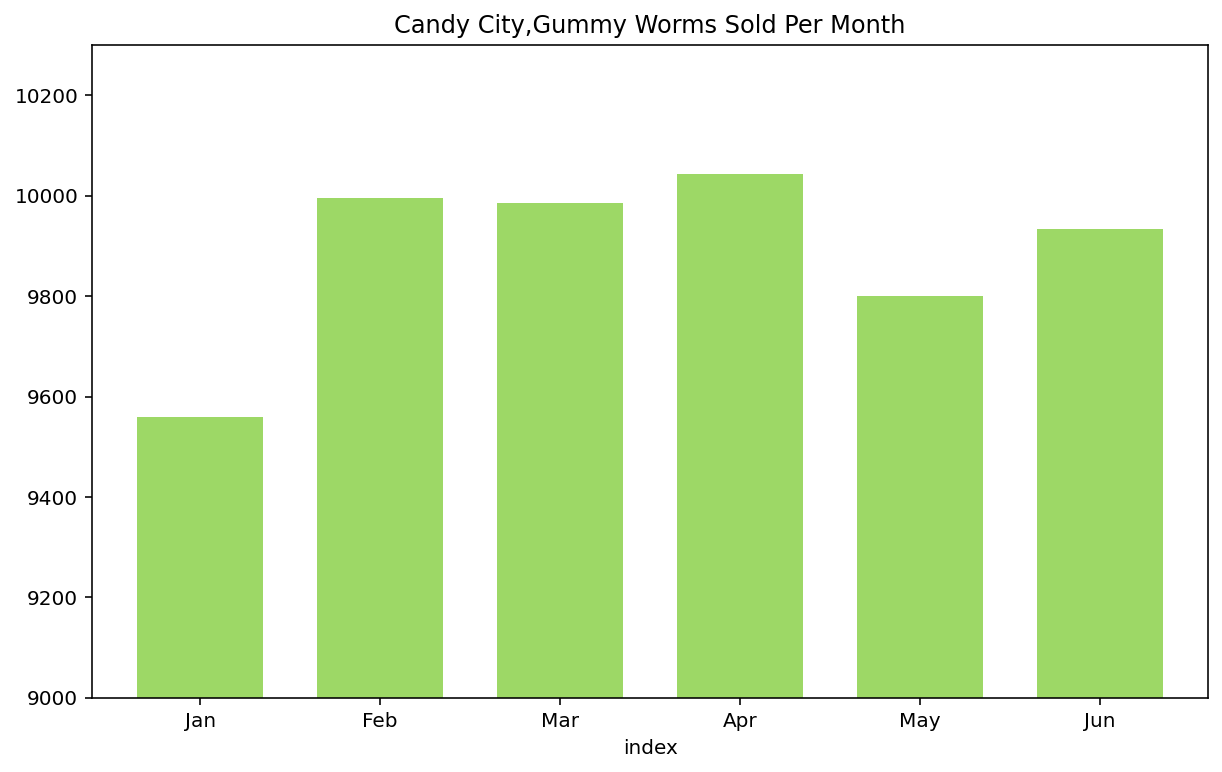

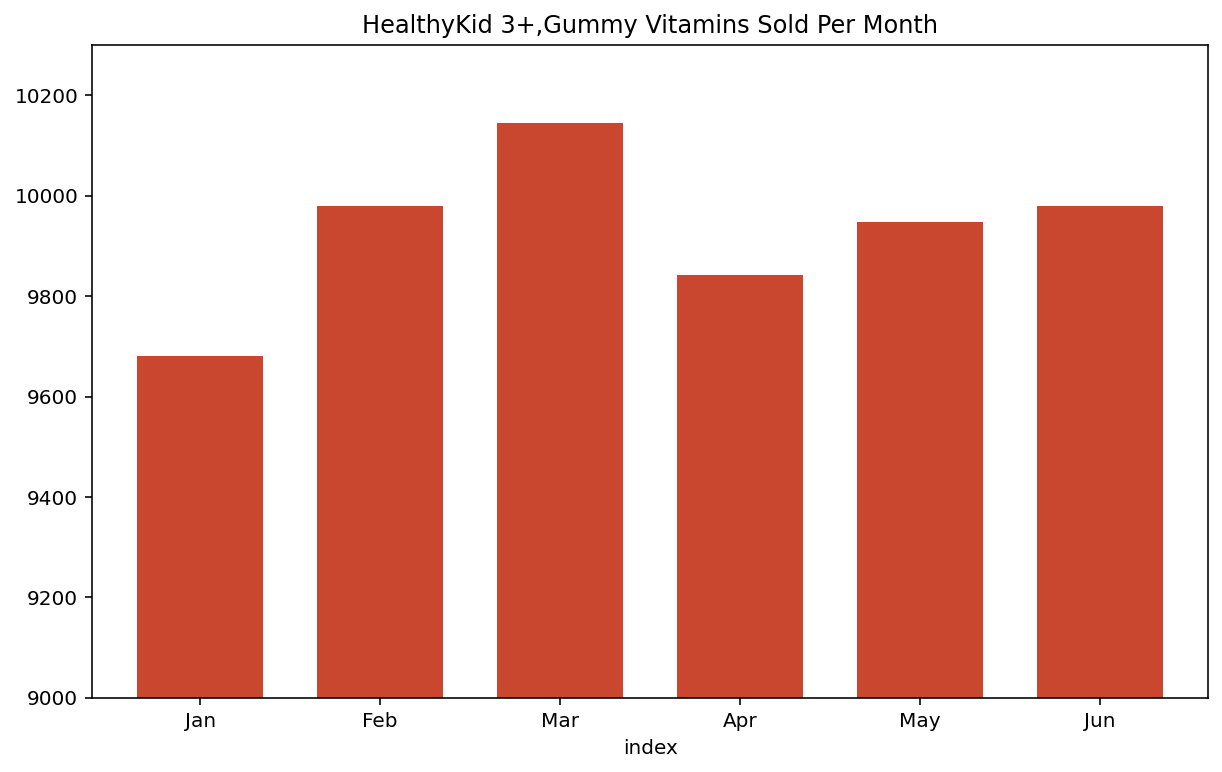

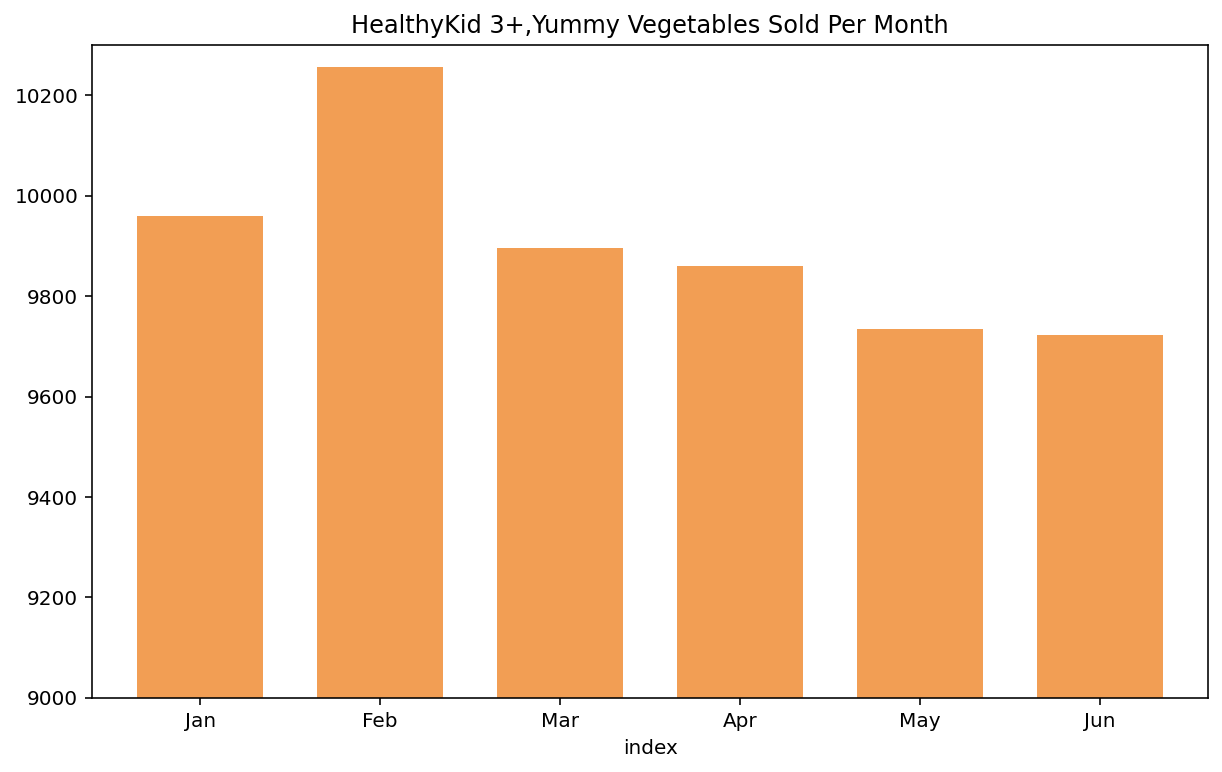

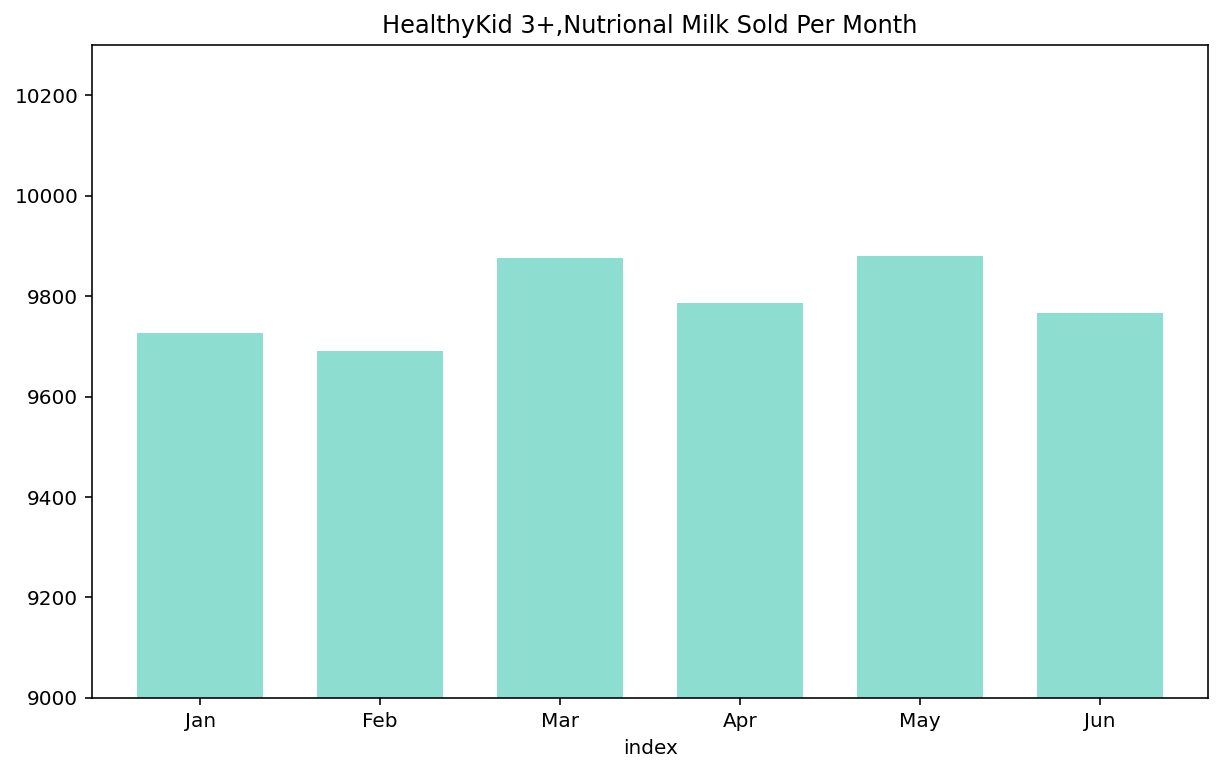

In [12]:
# Bar Graph of each Item Sold Per Month to showcase closer trends (increasing or decreasing nature of each item)

# .ylim src: https://www.geeksforgeeks.org/matplotlib-pyplot-ylim-in-python/

for item_count in range(len(items_list)):
    item_per_month.reset_index().plot.bar(x="index", y=items_list[item_count], width=0.7, color=colors_list[item_count], rot=0, legend=None)
    plt.title(items_list[item_count]+" Sold Per Month")
    plt.ylim(bottom=9000, top=10300)
    plt.show()

### Breakdown of Revenue Per Item Per Month

In [13]:
# Creating a new DataFrame (sales_df) to replace the quantity breakdown of each item to revenue

# .copy() src: https://github.com/jilagan/ITMGT25.03_Intersession2020/blob/master/Introduction%20to%20Pandas.ipynb

sales_df = transaction_df.copy()

# automating updating the price of each item by multiplying the items bought by price
count = 0

while count < len(items_list):
    sales_df[items_list[count]]=sales_df[items_list[count]]*price_list[count]
    count += 1

In [14]:
# Creating a new DataFrame (sales_per_month) using groupby ~ removing the row 'month' to show the data accurately in the graphs ~

sales_per_month = sales_df.groupby('month')[items_list].sum().set_axis(month_list, axis='rows')
sales_per_month.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Revenue Per Item Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Jan,Feb,Mar,Apr,May,Jun
"Exotic Extras,Beef Chicharon",12554835,12991299,12750984,12847110,13026372,12862698
"Exotic Extras,Kimchi and Seaweed",7731124,7949251,7963633,7926879,7808627,8073096
"Candy City,Orange Beans",1945026,1997363,1912589,1972886,1982836,2011094
"Candy City,Gummy Worms",1433850,1499400,1497900,1506450,1470150,1490100
"HealthyKid 3+,Gummy Vitamins",14521500,14970000,15217500,14763000,14922000,14970000
"HealthyKid 3+,Yummy Vegetables",4979500,5128000,4948000,4930500,4867500,4861000
"HealthyKid 3+,Nutrional Milk",19356730,19285090,19653240,19474140,19663190,19436330


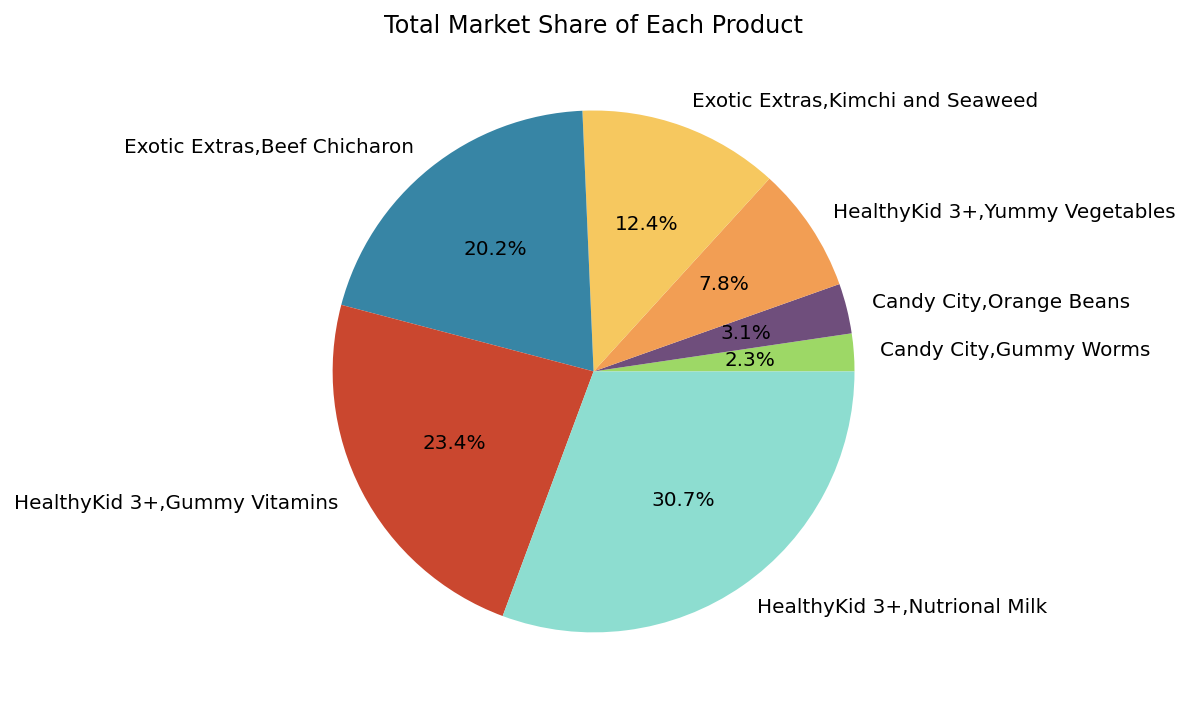

In [15]:
# Pie Chart of all Items Sold Per Month to show relevant trends

# autopct src: https://www.tutorialgateway.org/python-matplotlib-pie-chart/

sales_per_month[sales_per_month.columns[0:]].sum().sort_values(ascending=True).plot.pie(autopct='%1.1f%%',colors=["#9DD866","#6F4E7C","#F29E54","#F6C85F","#3785A5","#CA472F","#8DDDD0"])
plt.ylabel("")
plt.title("Total Market Share of Each Product")
plt.show()

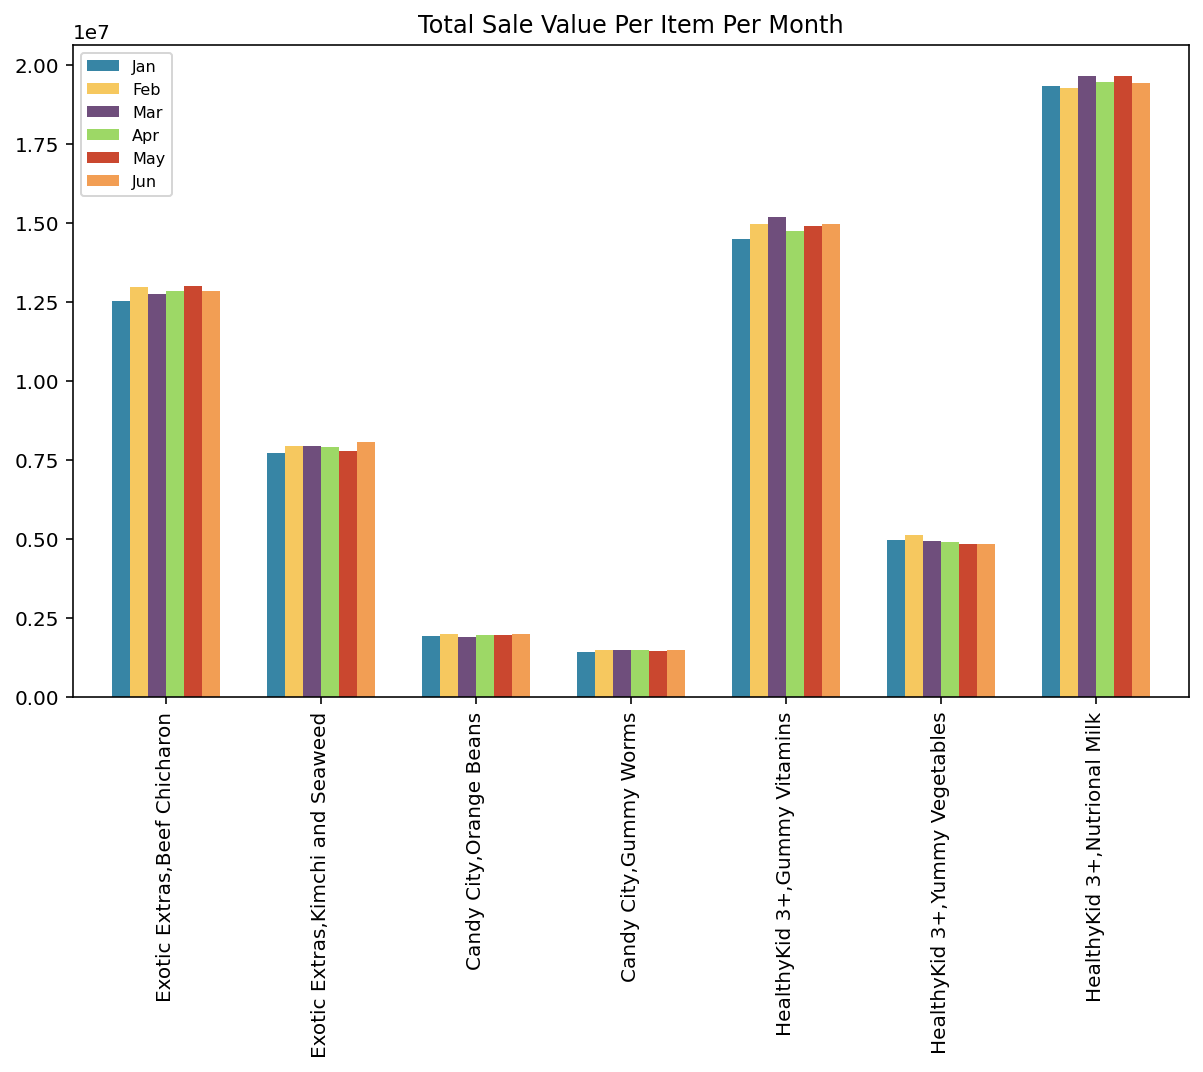

In [16]:
# Bar Graph of all Items Sold Per Month to show relevant trends

sales_per_month.T.plot.bar(width=0.7, color=colors_list)
plt.title("Total Sale Value Per Item Per Month")
plt.legend(prop={'size': 8})
plt.show()

### Breakdown of Customer Demographic

In [17]:
# Creating a new DataFrames (user_demographic) using groupby and agg

# unique user count src: https://stackoverflow.com/questions/58938571/pandas-count-average-number-of-unique-numbers-across-groups

user_demographic = transaction_df.groupby(['age group', 'sex']).agg({'username': 'nunique'})
user_demographic_sex = transaction_df.groupby(['sex']).agg({'username': 'nunique'})
user_demographic_age = transaction_df.groupby(['age group']).agg({'username': 'nunique'})

#rename columns src: https://www.statology.org/pandas-rename-columns/

user_demographic.rename(columns = {"username": "total users"}, inplace = True)
user_demographic_sex.rename(columns = {"username": "total users"}, inplace = True)
user_demographic_age.rename(columns = {"username": "total users"}, inplace = True)

user_demographic.style.set_caption("Breakdown of Customer Demographic").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

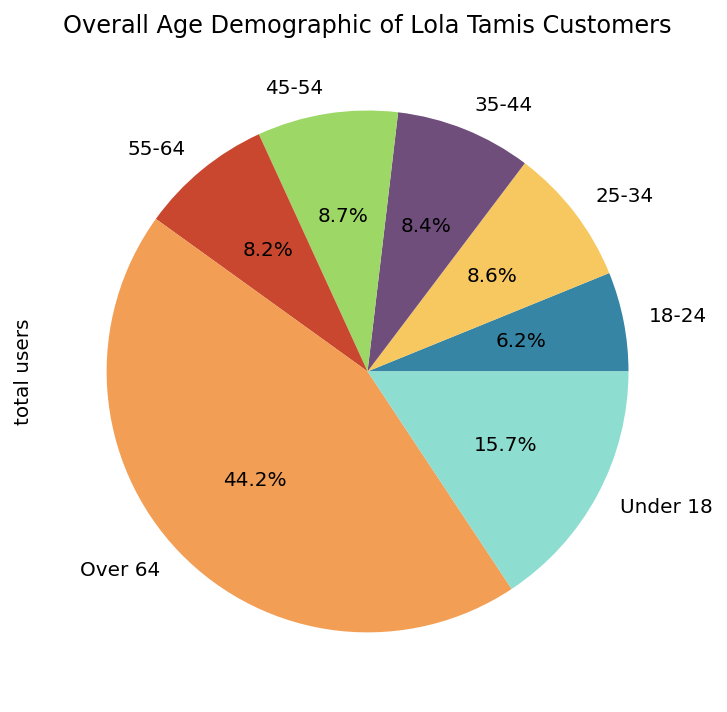

In [18]:
# Pie Chart of the User Demographic

user_demographic_age.plot.pie(y='total users',legend=None,autopct='%1.1f%%', colors=colors_list)
plt.title("Overall Age Demographic of Lola Tamis Customers")
plt.show()

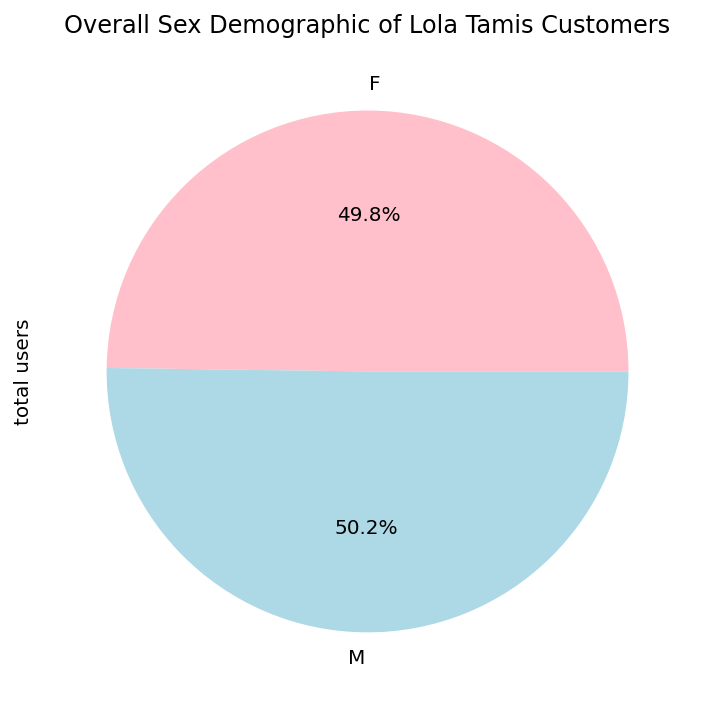

In [19]:
user_demographic_sex.plot.pie(y='total users',legend=None,autopct='%1.1f%%', colors=['pink','lightblue'])
plt.title("Overall Sex Demographic of Lola Tamis Customers")
plt.show()

### Breakdown of Product Demands

**Product Demands by Demographic**

In [20]:
# Creating a new DataFrame (user_demographic) using groupby

product_demand = transaction_df.groupby(['age group', 'sex'])[items_list].sum()
product_demand_sex = transaction_df.groupby(['sex','month'])[items_list].sum()
product_demand_age = transaction_df.groupby(['age group'])[items_list].sum()
product_demand.style.set_caption("Product Demand of Lola Tamis Customers by Demographic").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

In [21]:
product_demand_age.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Product Demand of Lola Tamis Customers by Age Group").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

age group,18-24,25-34,35-44,45-54,55-64,Over 64,Under 18
"Exotic Extras,Beef Chicharon",3525,4744,4911,5142,4887,26810,9283
"Exotic Extras,Kimchi and Seaweed",3627,5275,4801,5060,4717,26556,9354
"Candy City,Orange Beans",3819,4877,4821,5152,4921,26309,9507
"Candy City,Gummy Worms",3777,4865,4908,5156,4849,26612,9152
"HealthyKid 3+,Gummy Vitamins",3564,4952,4906,5301,4993,26604,9256
"HealthyKid 3+,Yummy Vegetables",3706,4939,5082,5133,4734,26668,9167
"HealthyKid 3+,Nutrional Milk",3441,4808,4746,5069,4745,26539,9380


In [22]:
product_demand_sex.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Product Demand of Lola Tamis Customers by Sex by Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

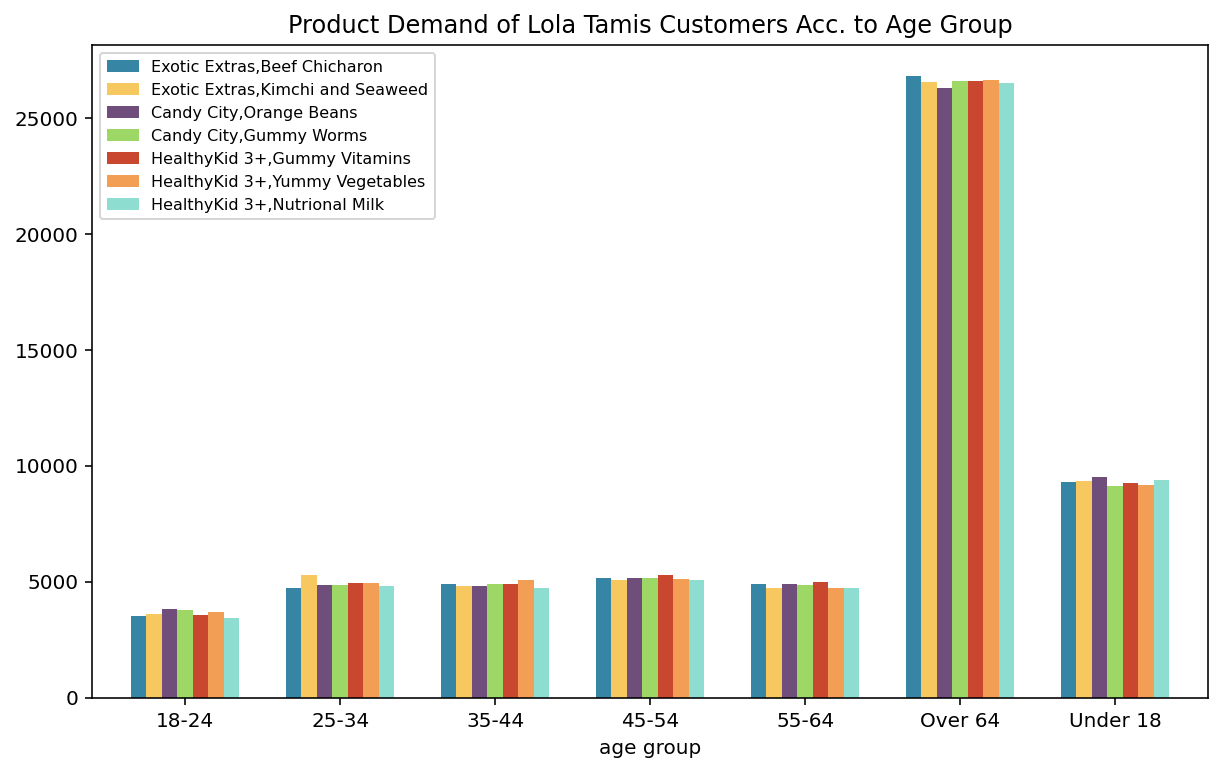

In [23]:
# Bar Graph of the Product Demand Acc. to Age Group

product_demand_age.plot.bar(rot=0,width=0.7, color=colors_list)
plt.title("Product Demand of Lola Tamis Customers Acc. to Age Group")
plt.legend(prop={'size': 8})
plt.show()

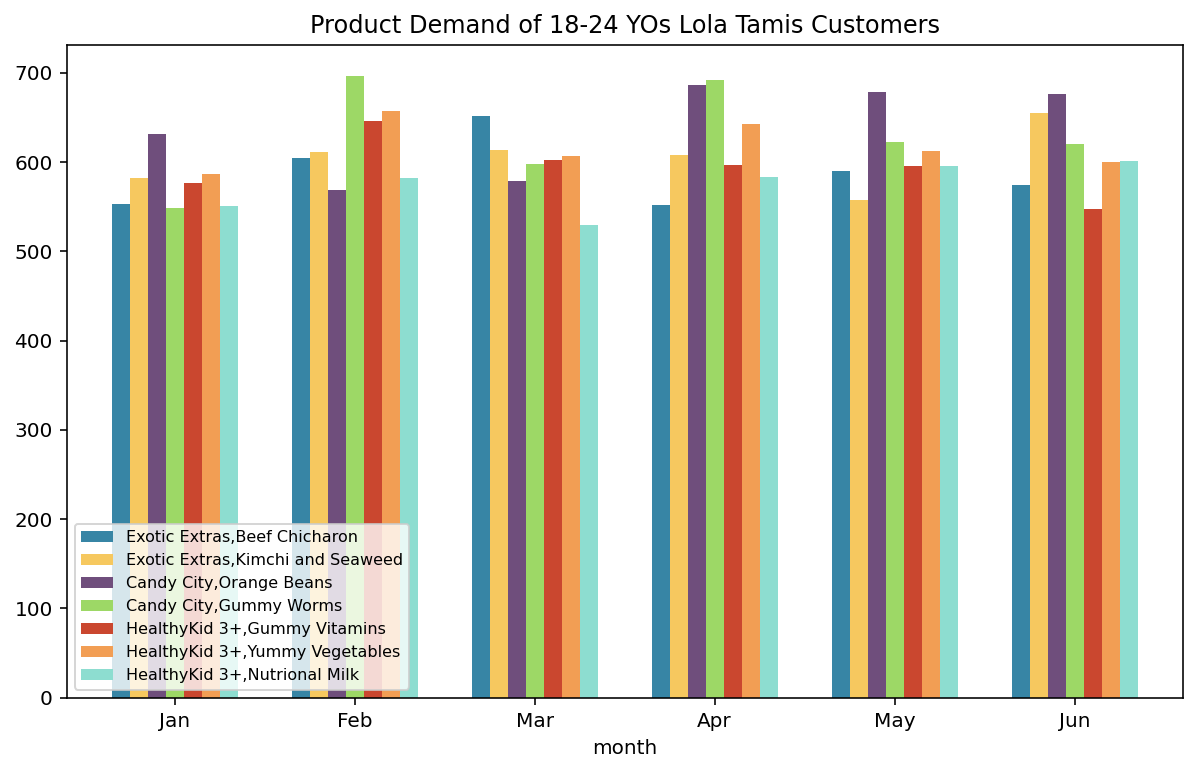

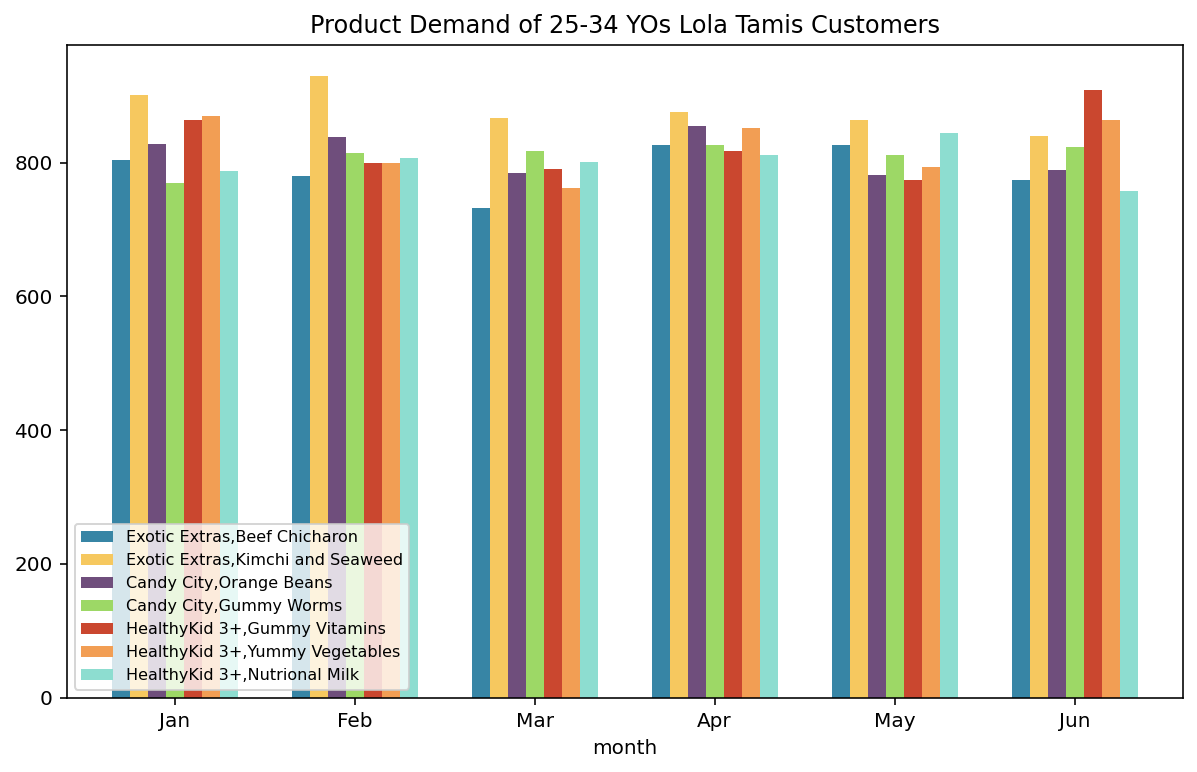

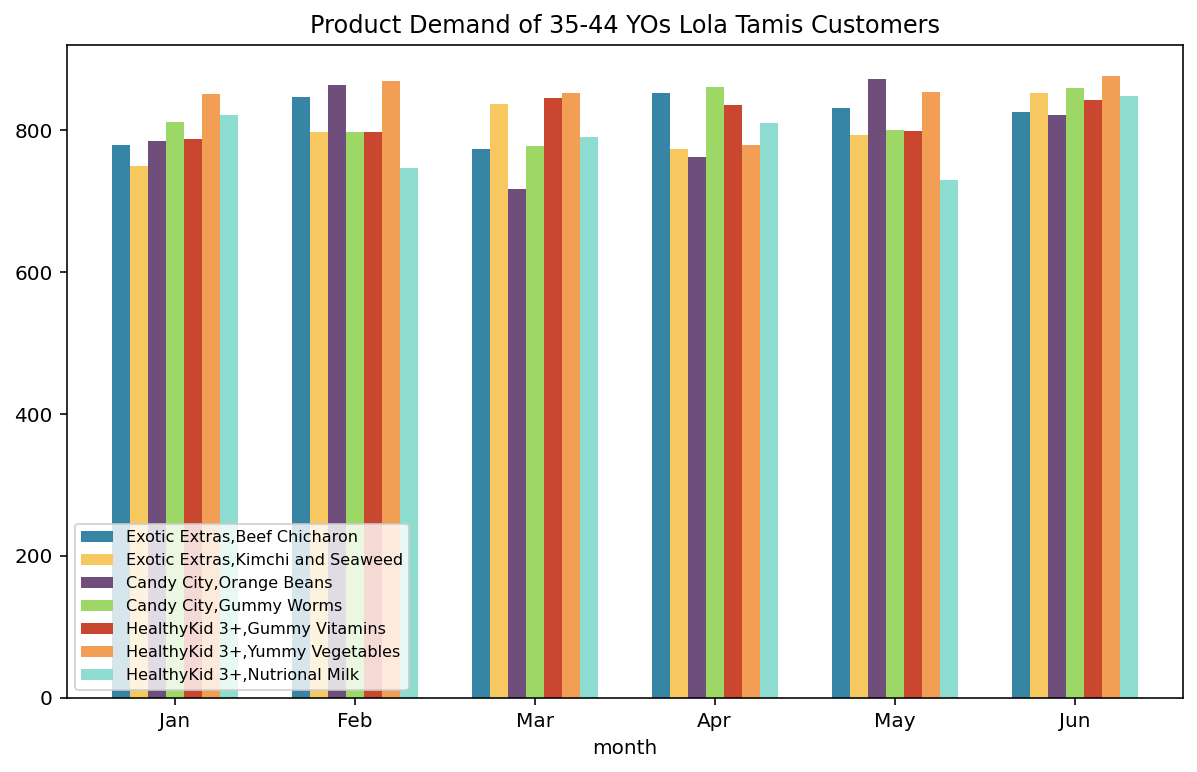

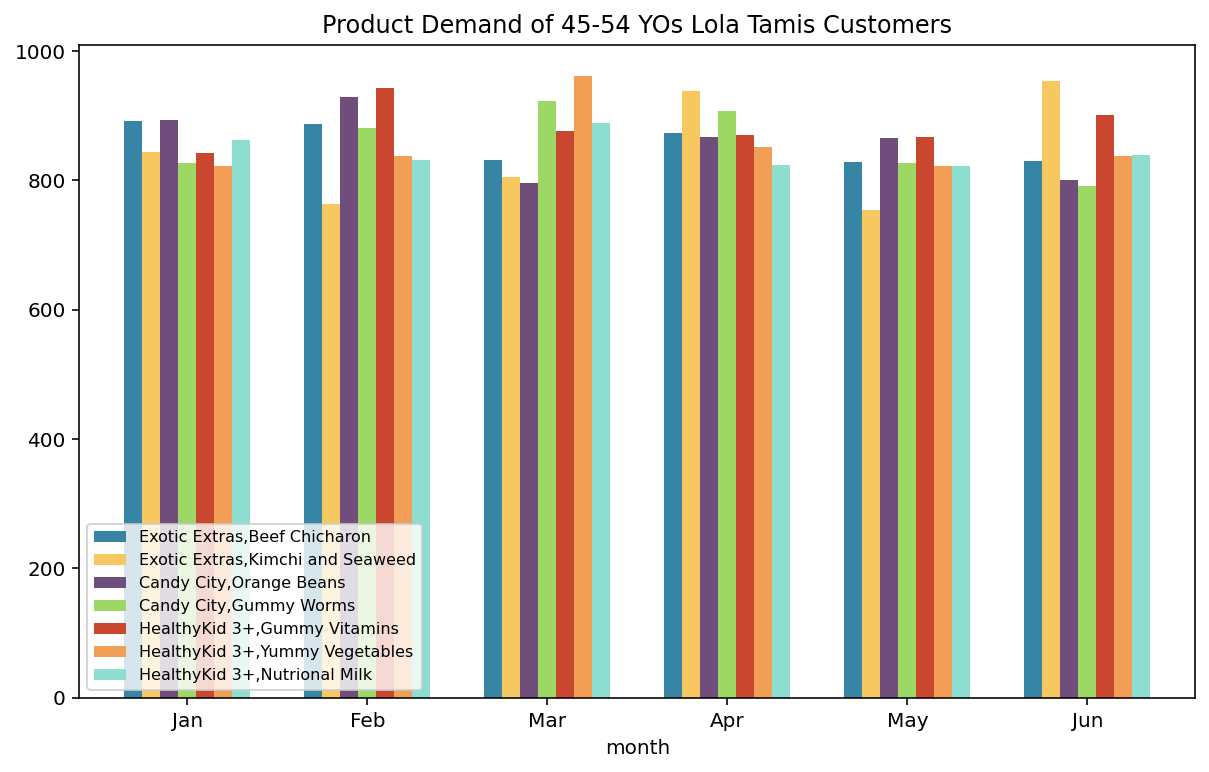

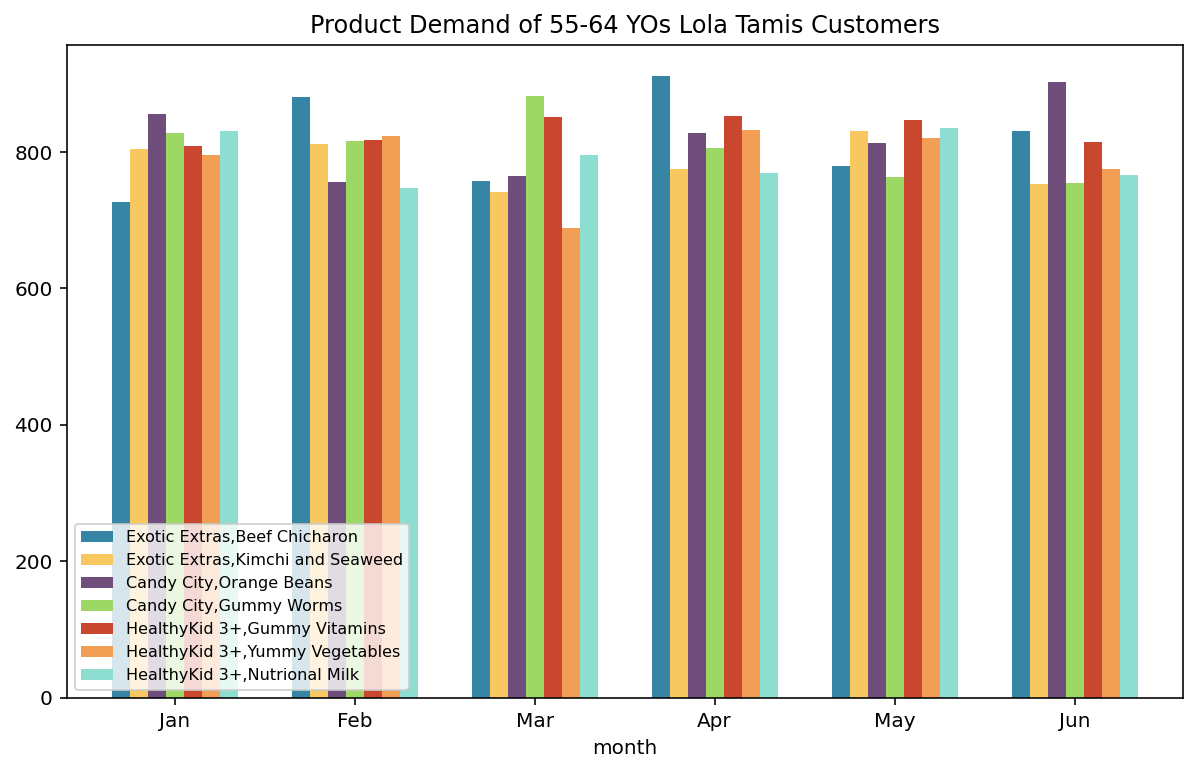

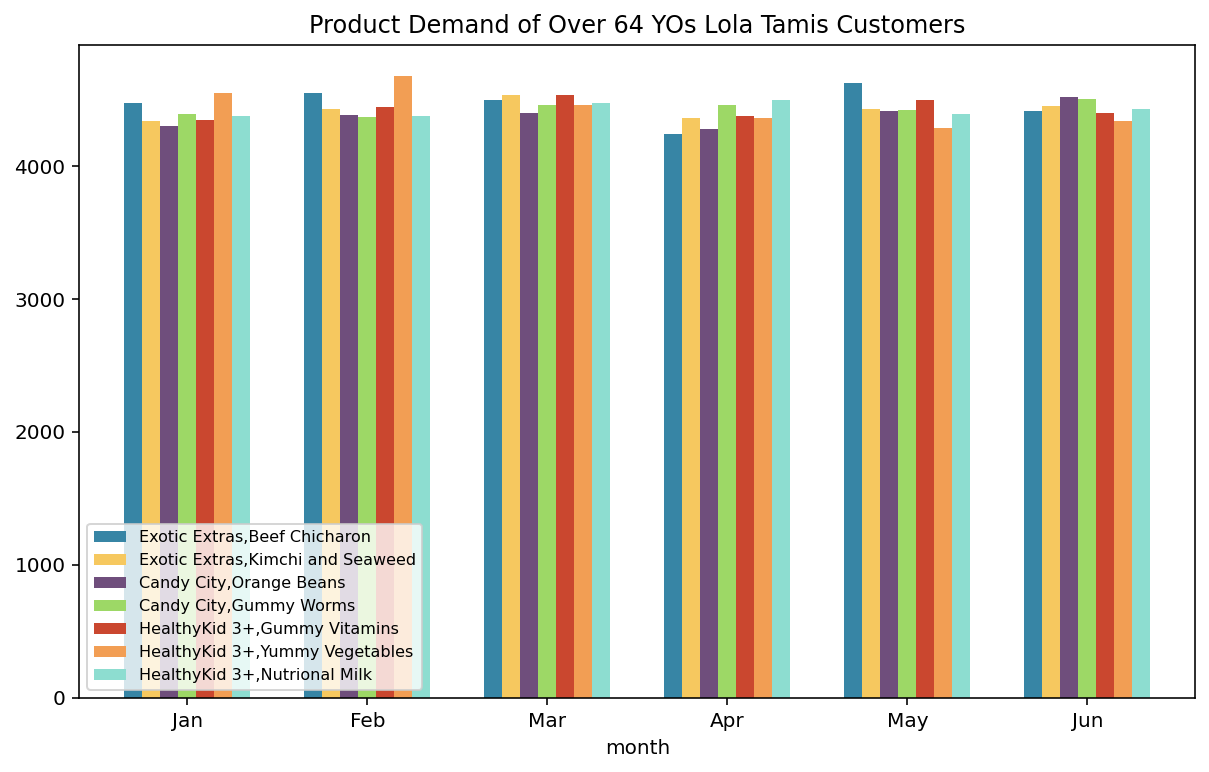

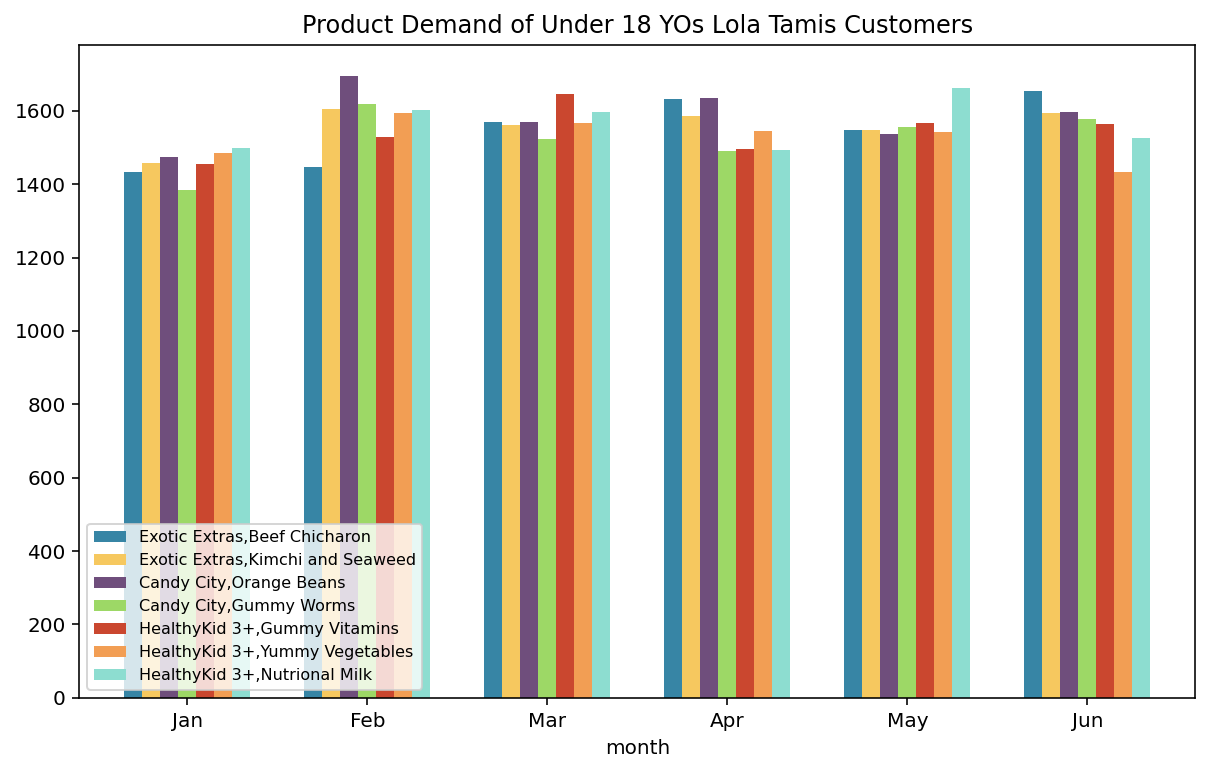

In [24]:
product_demand_age_month = transaction_df.groupby(['age group','month'])[items_list].sum()

for age_group_count in range(len(age_groups_list)):
    product_demand_age_month.loc[age_groups_list[age_group_count]].plot.bar(width=0.7, color=colors_list, rot=0)
    plt.subplot().set_xticklabels(month_list) 
    plt.legend(loc='lower left',prop={'size': 8})
    plt.title("Product Demand of " + age_groups_list[age_group_count] + " YOs Lola Tamis Customers")
    plt.show()

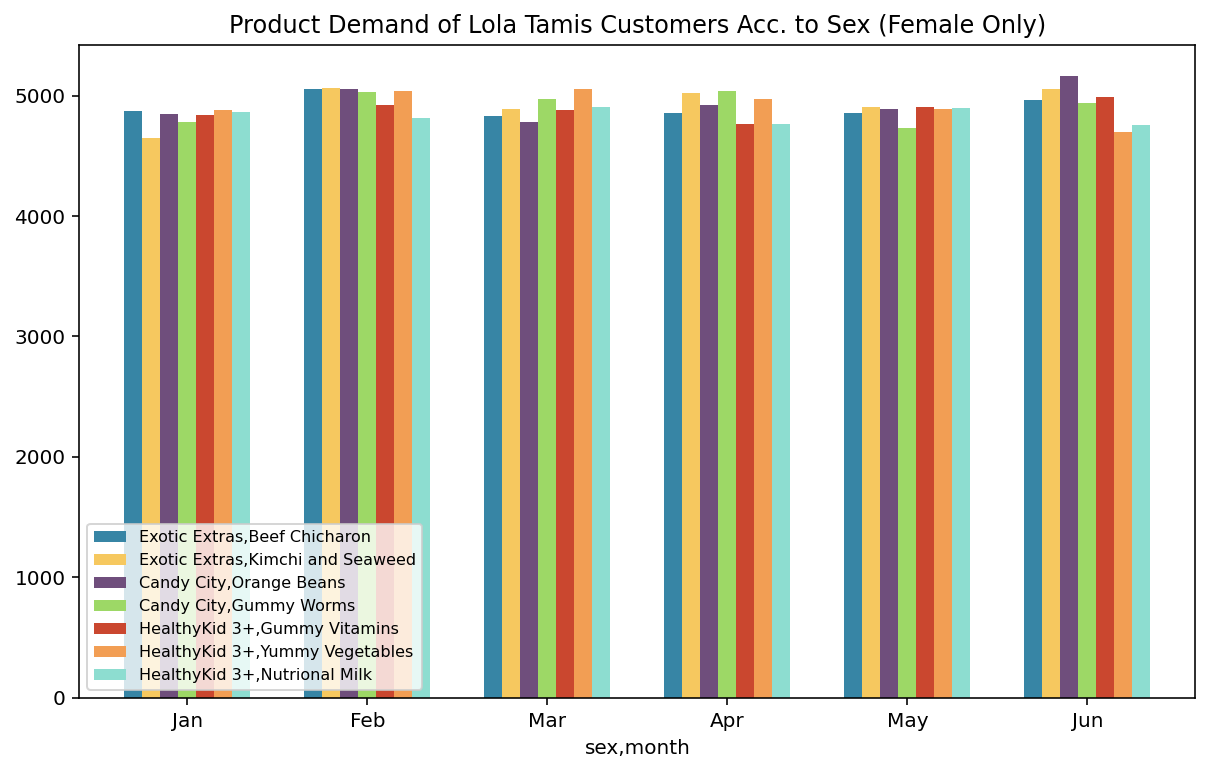

In [25]:
# Bar Graph of the Product Demand Acc. to Sex

product_demand_sex.loc[['F']].plot.bar(rot=0,width=0.7, color=colors_list)
plt.subplot().set_xticklabels(month_list)
plt.title("Product Demand of Lola Tamis Customers Acc. to Sex (Female Only)")
plt.legend(loc='lower left',prop={'size': 8})
plt.show()

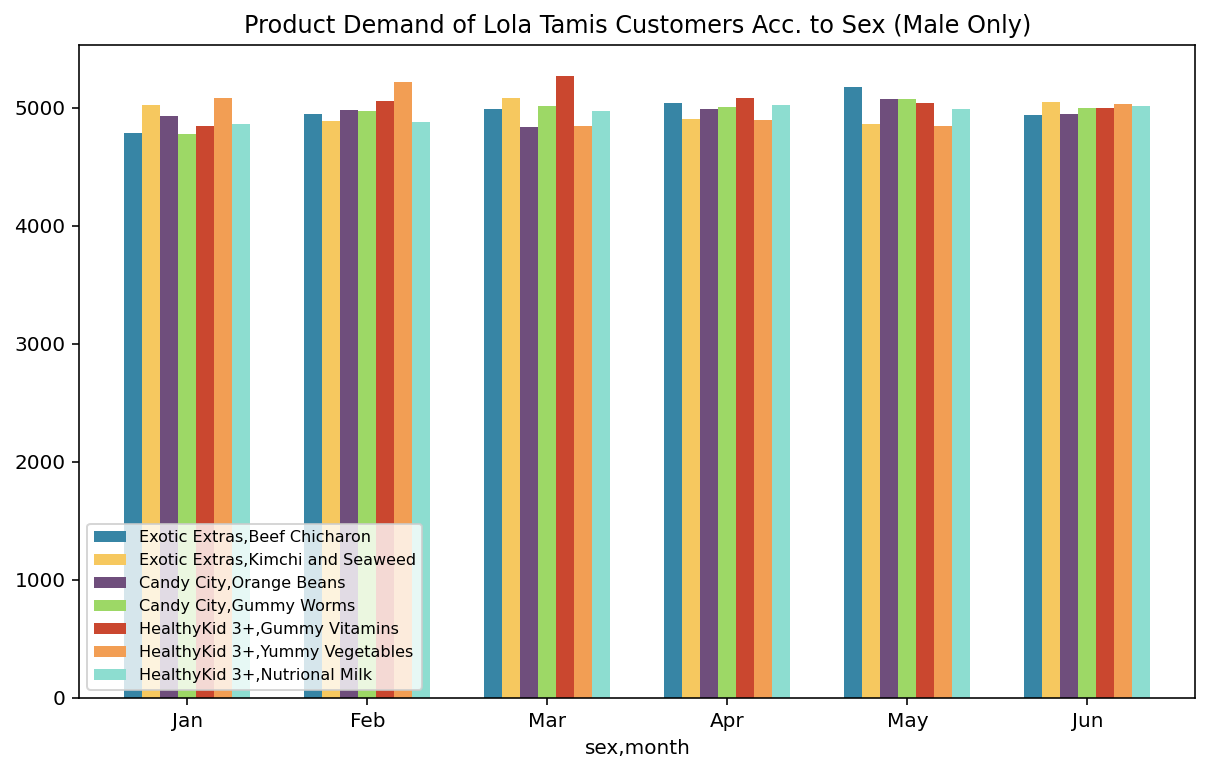

In [26]:
product_demand_sex.loc[['M']].plot.bar(rot=0,width=0.7, color=colors_list)
plt.subplot().set_xticklabels(month_list)
plt.title("Product Demand of Lola Tamis Customers Acc. to Sex (Male Only)")
plt.legend(loc='lower left',prop={'size': 8})
plt.show()

### Breakdown of Revenue by Product by Demographic

In [27]:
# Creating a new DataFrame (user_demographic) using groupby

revenue_by_demographic = sales_df.groupby(['age group', 'sex'])[items_list].sum()
revenue_by_demographic_sex = sales_df.groupby(['sex','month'])[items_list].sum()
revenue_by_demographic_age = sales_df.groupby(['age group'])[items_list].sum()
revenue_by_demographic.style.set_caption("Breakdown of Revenue by Product by Demographic").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

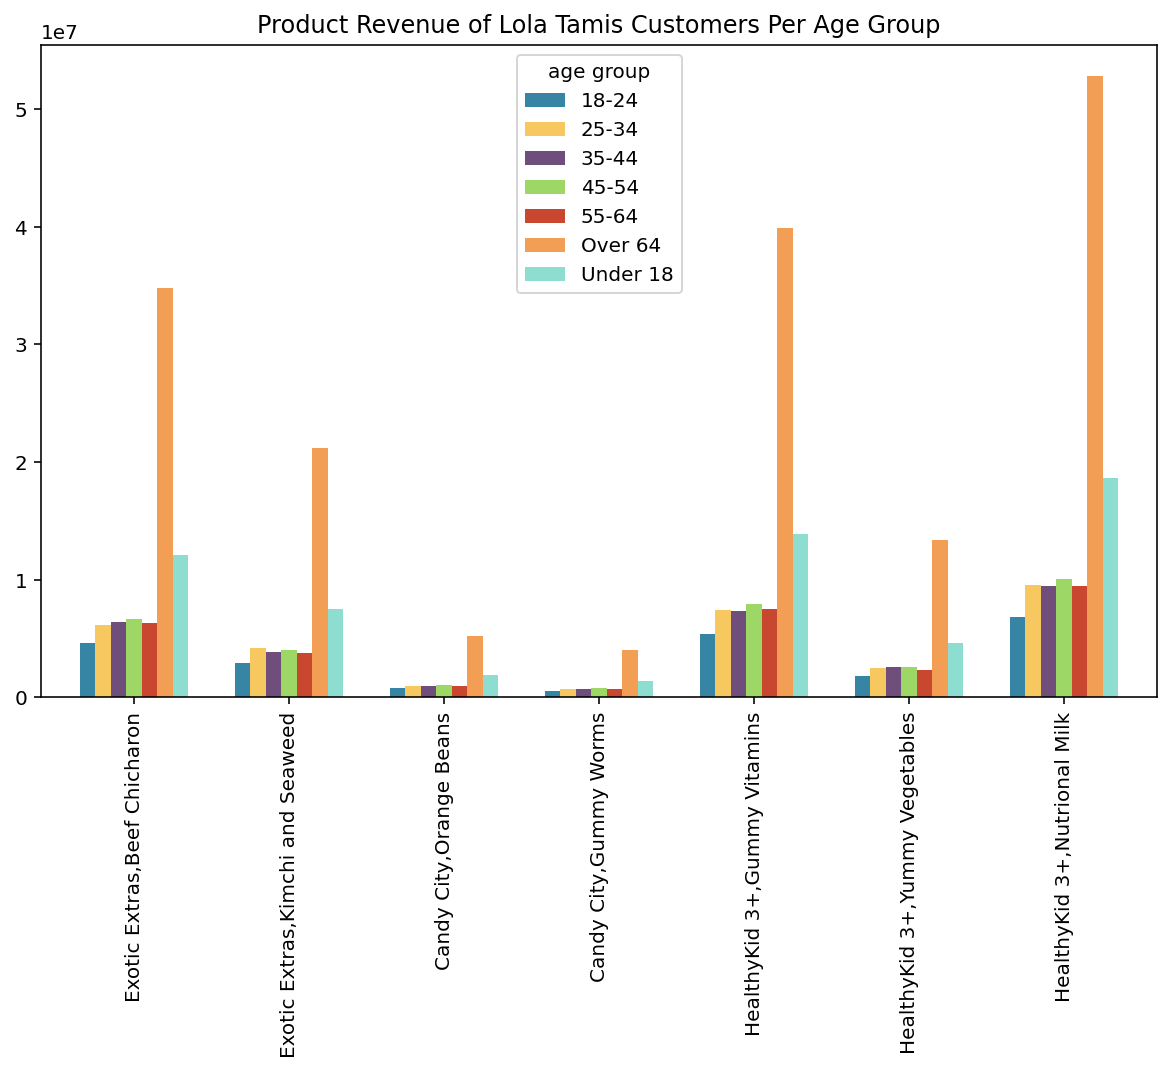

In [28]:
# Bar Graph of the Revenue Acc. to Age Group

revenue_by_demographic_age.T.plot.bar(width=0.7, color=colors_list)
plt.title("Product Revenue of Lola Tamis Customers Per Age Group")
plt.show()

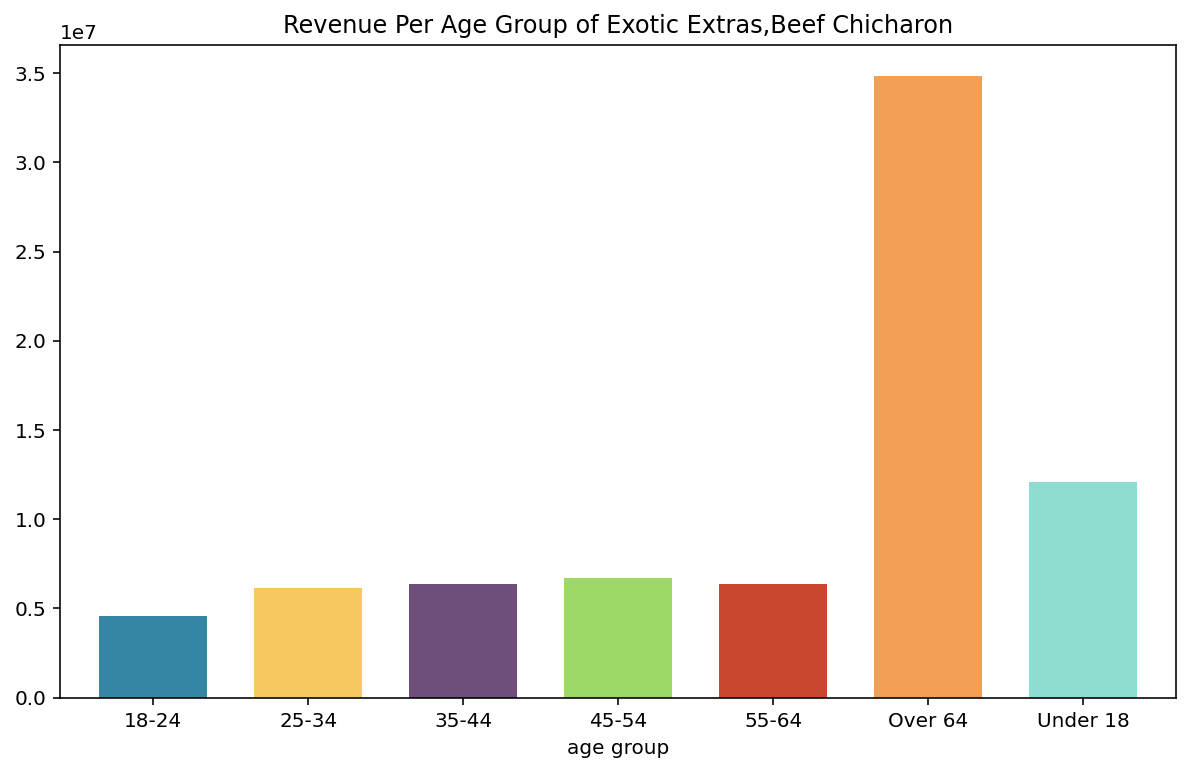

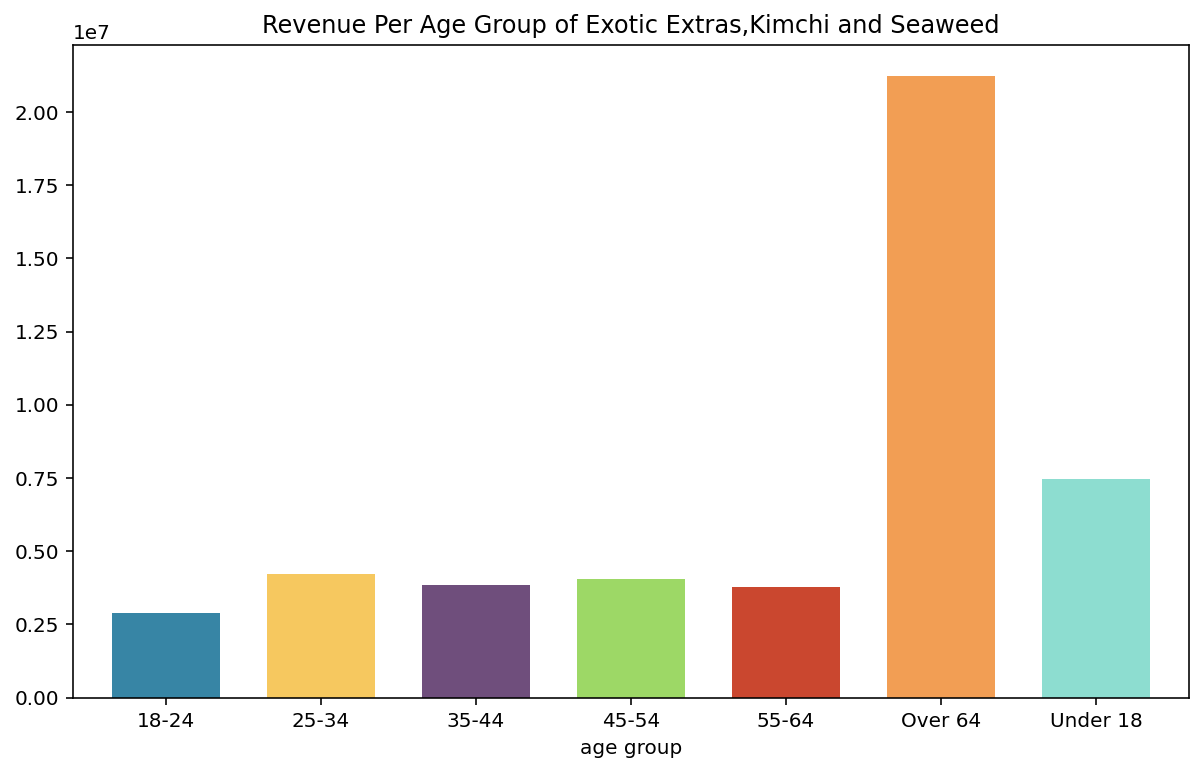

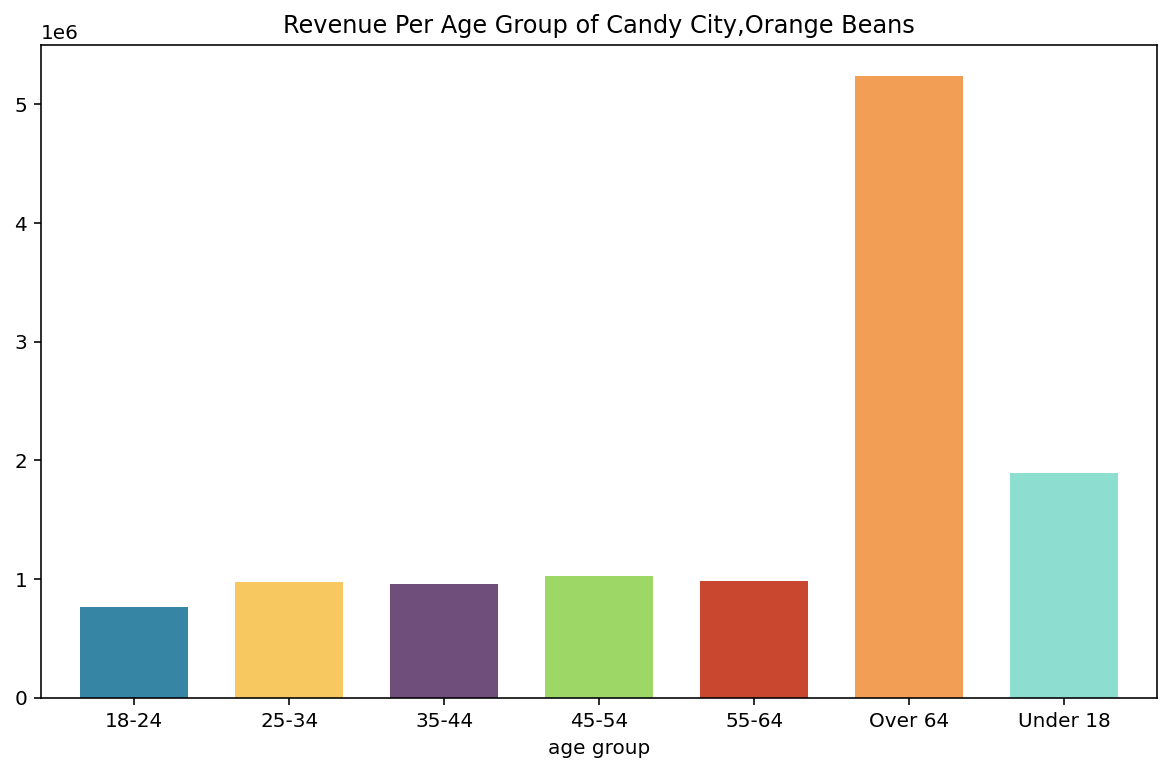

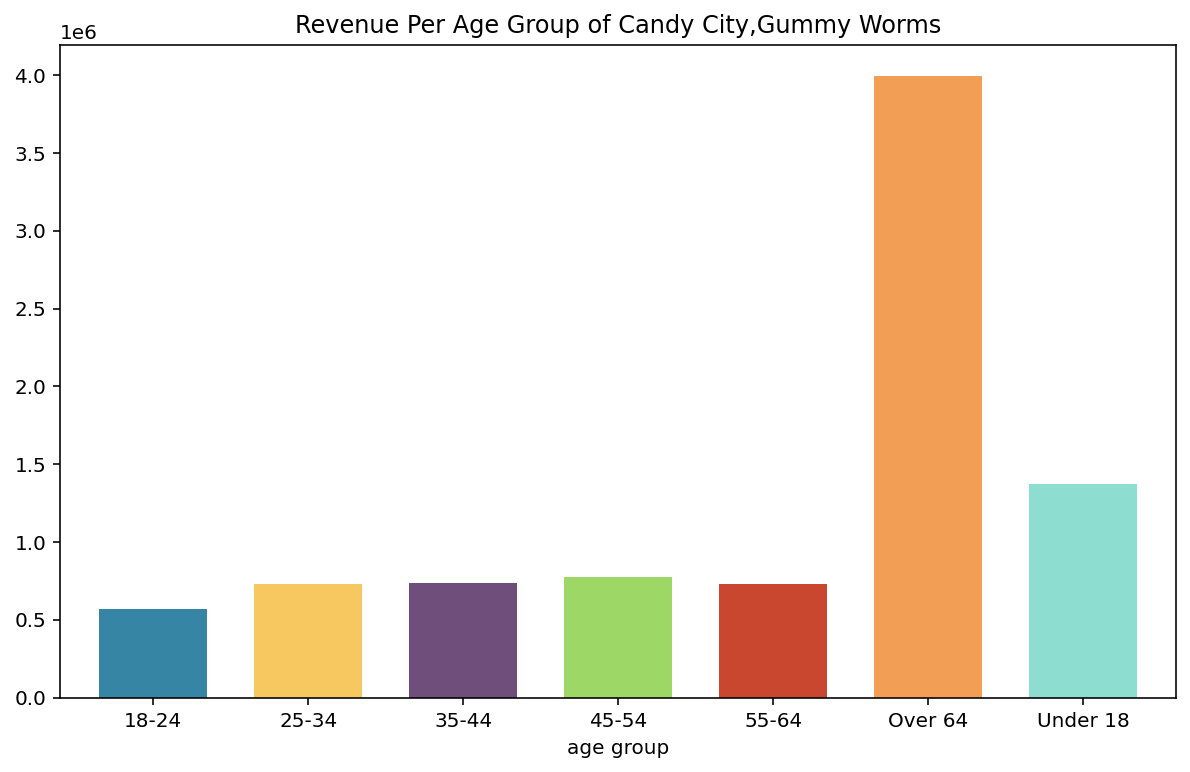

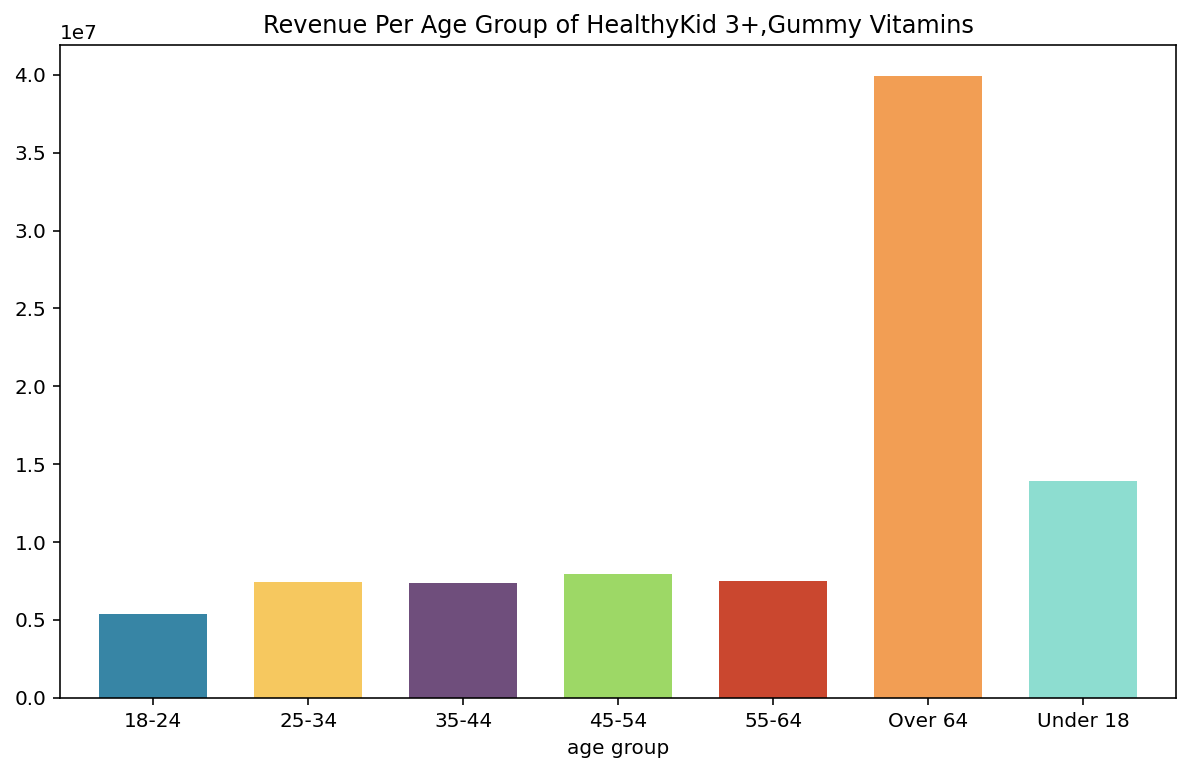

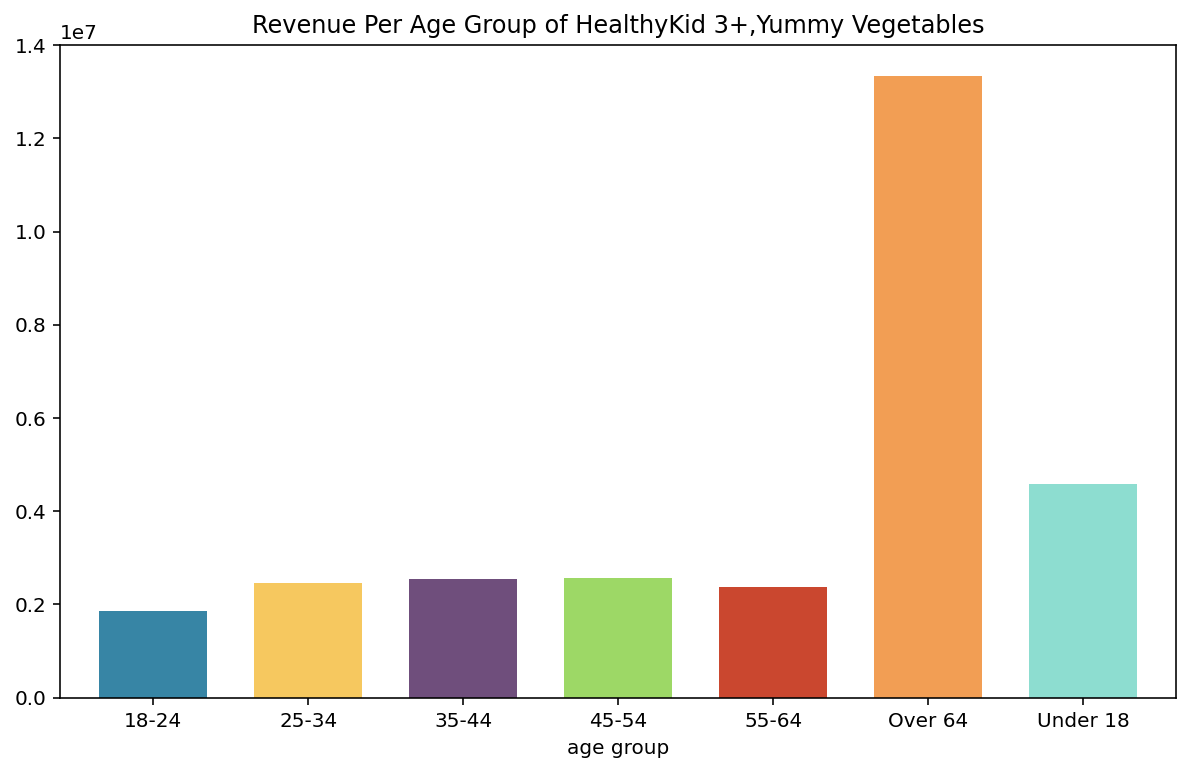

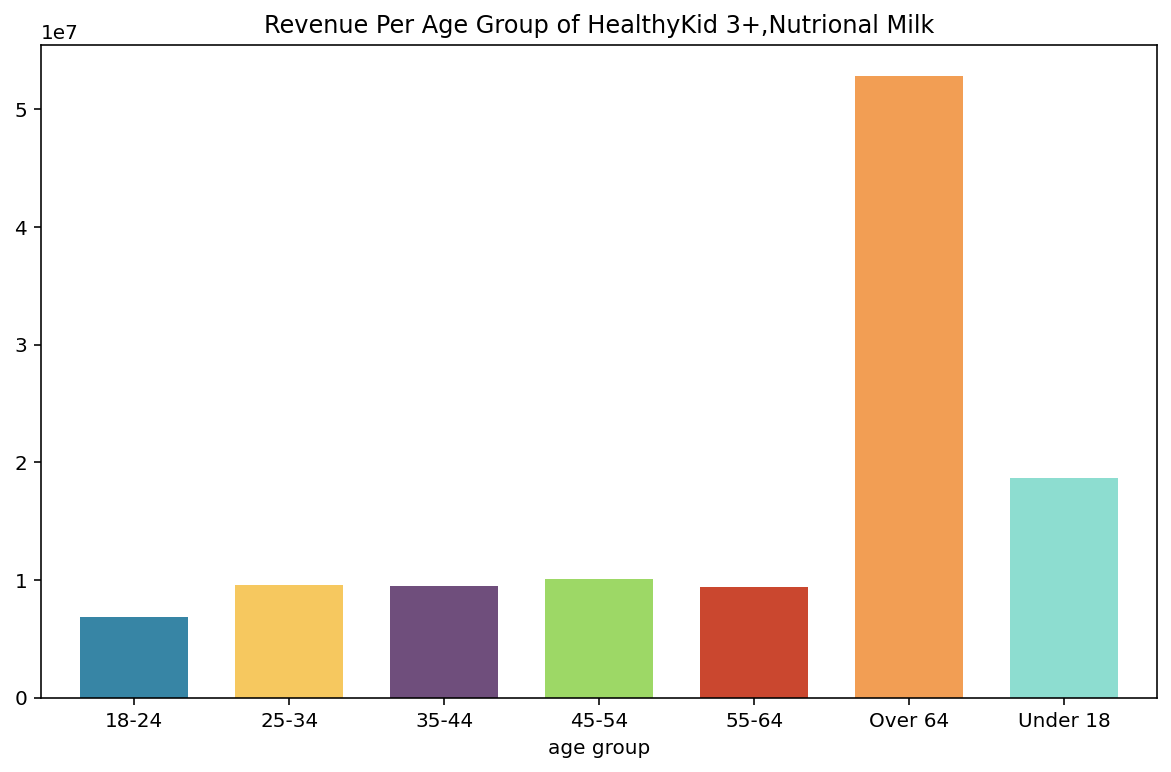

In [29]:
for item_count in range(len(items_list)):
    revenue_by_demographic_age.T.loc[items_list[item_count]].plot.bar(y=age_groups_list, rot=0,width=0.7, color=colors_list)
    plt.title("Revenue Per Age Group of " + items_list[item_count])
    plt.show()

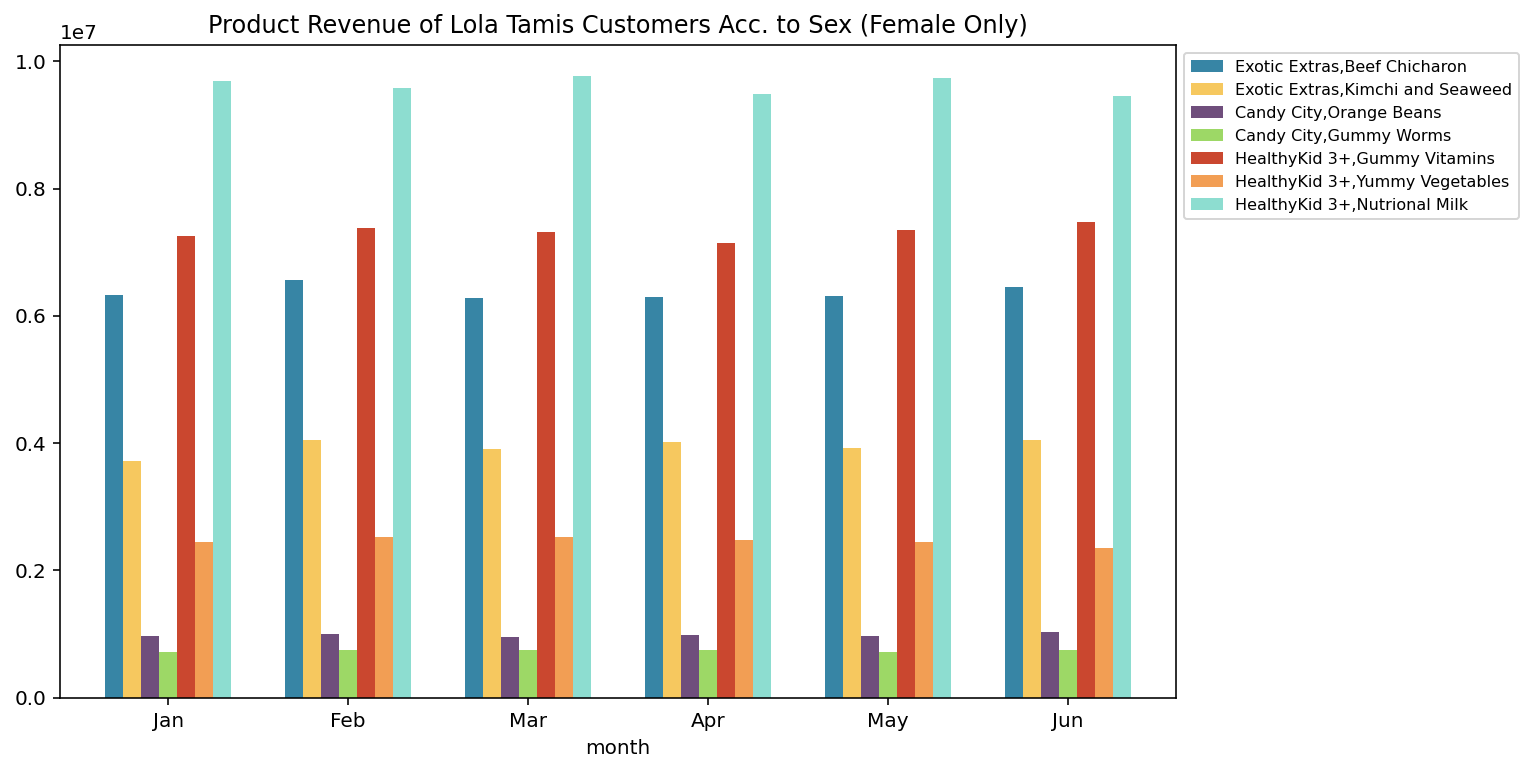

In [30]:
# put legend outside graph src: https://pythonguides.com/put-legend-outside-plot-matplotlib/

revenue_by_demographic_sex.loc['F'].plot.bar(rot=0, width=0.7, color=colors_list)
plt.subplot().set_xticklabels(month_list)
plt.title("Product Revenue of Lola Tamis Customers Acc. to Sex (Female Only)")
plt.legend(bbox_to_anchor =(1, 1),prop={'size': 8})
plt.show()

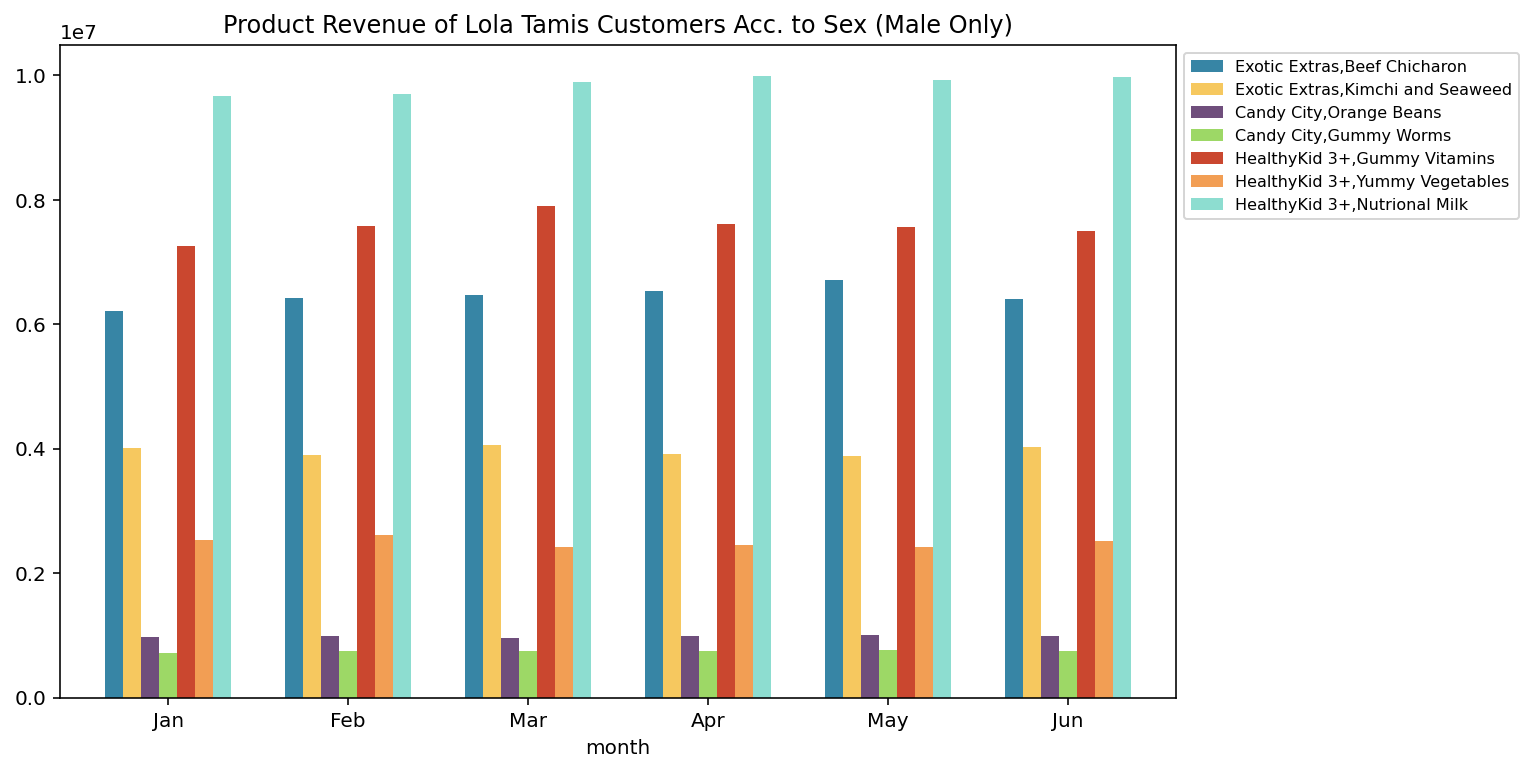

In [31]:
revenue_by_demographic_sex.loc['M'].plot.bar(rot=0, width=0.7, color=colors_list)
plt.subplot().set_xticklabels(month_list)
plt.title("Product Revenue of Lola Tamis Customers Acc. to Sex (Male Only)")
plt.legend(bbox_to_anchor =(1, 1),prop={'size': 8})
plt.show()

### Breakdown of Brand Performance

In [32]:
#src: https://www.statology.org/pandas-sum-specific-columns/
    # https://www.adamsmith.haus/python/answers/how-to-check-if-a-list-contains-a-substring-in-python
    # https://www.educative.io/answers/how-to-delete-a-column-in-pandas

brand_per_month = item_per_month.copy()

for count in range(len(brands_list)):
    items_in_brand = [string for string in items_list if brands_list[count] in string]
    brand_per_month[brands_list[count]] = brand_per_month[items_in_brand].sum(axis=1)
    count += 1

for count in range(len(items_list)):
    del brand_per_month[items_list[count]]
    count += 1

brand_per_month.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Items Sold Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Jan,Feb,Mar,Apr,May,Jun
Exotic Extras,19341,19950,19783,19811,19801,20006
Candy City,19333,20033,19597,19957,19765,20040
HealthyKid 3+,29367,29927,29917,29489,29564,29469


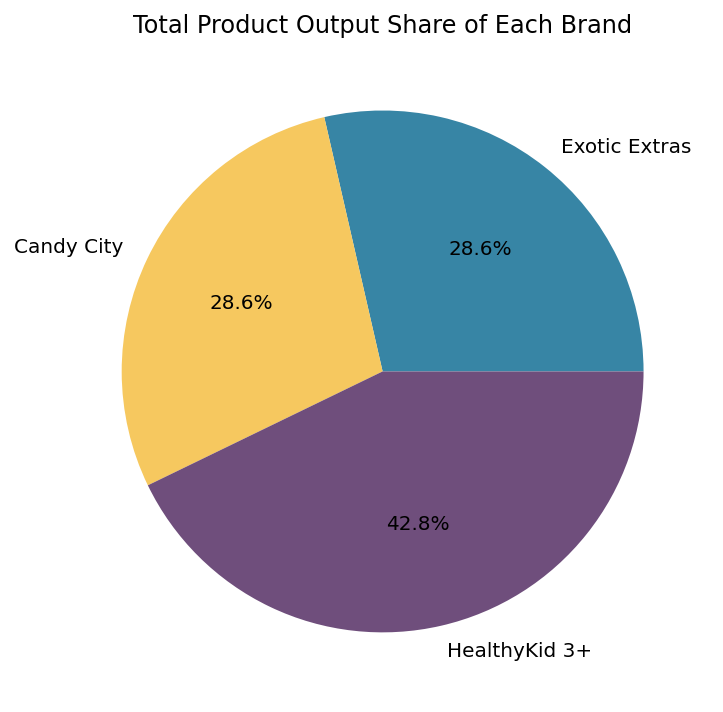

In [33]:
brand_per_month[brand_per_month.columns[0:]].sum().plot.pie(autopct='%1.1f%%',colors=colors_list)
plt.ylabel("")
plt.title("Total Product Output Share of Each Brand")
plt.show()

In [34]:
revenue_per_brand_per_month = sales_per_month.copy()

for count in range(len(brands_list)):
    items_in_brand = [string for string in items_list if brands_list[count] in string]
    revenue_per_brand_per_month[brands_list[count]] = revenue_per_brand_per_month[items_in_brand].sum(axis=1)
    count += 1

for count in range(len(items_list)):
    del revenue_per_brand_per_month[items_list[count]]
    count += 1

revenue_per_brand_per_month.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Items Sold Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Jan,Feb,Mar,Apr,May,Jun
Exotic Extras,20285959,20940550,20714617,20773989,20834999,20935794
Candy City,3378876,3496763,3410489,3479336,3452986,3501194
HealthyKid 3+,38857730,39383090,39818740,39167640,39452690,39267330


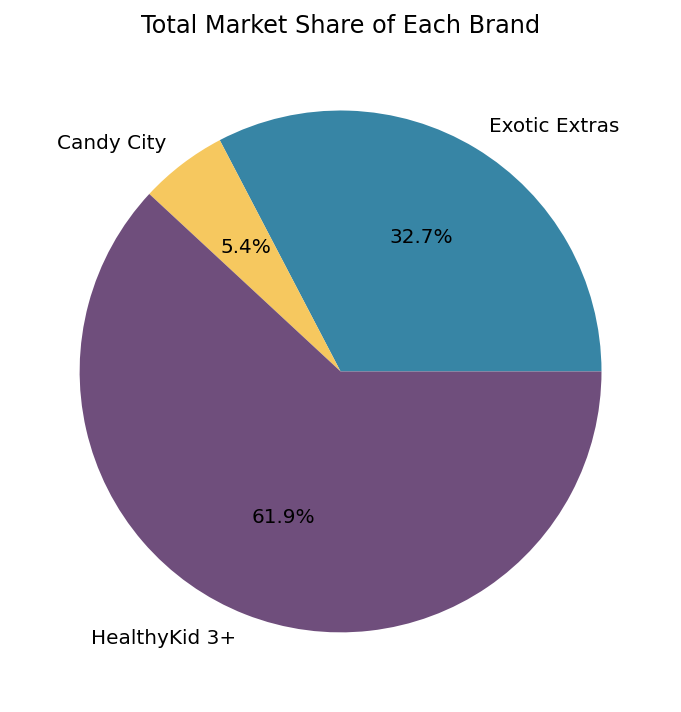

In [35]:
revenue_per_brand_per_month[revenue_per_brand_per_month.columns[0:]].sum().plot.pie(autopct='%1.1f%%',colors=colors_list)
plt.ylabel("")
plt.title("Total Market Share of Each Brand")
plt.show()

In [36]:
product_demand_per_brand = product_demand.copy()

for count in range(len(brands_list)):
    items_in_brand = [string for string in items_list if brands_list[count] in string]
    product_demand_per_brand[brands_list[count]] = product_demand_per_brand[items_in_brand].sum(axis=1)
    count += 1

for count in range(len(items_list)):
    del product_demand_per_brand[items_list[count]]
    count += 1

product_demand_per_brand.T.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Items Sold Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

In [37]:
product_demand_per_brand_sex = product_demand_sex.copy()

for count in range(len(brands_list)):
    items_in_brand = [string for string in items_list if brands_list[count] in string]
    product_demand_per_brand_sex[brands_list[count]] = product_demand_per_brand_sex[items_in_brand].sum(axis=1)
    count += 1

for count in range(len(items_list)):
    del product_demand_per_brand_sex[items_list[count]]
    count += 1

product_demand_per_brand_sex.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Items Sold Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

In [38]:
product_demand_per_brand_age = product_demand_age.copy()

for count in range(len(brands_list)):
    items_in_brand = [string for string in items_list if brands_list[count] in string]
    product_demand_per_brand_age[brands_list[count]] = product_demand_per_brand_age[items_in_brand].sum(axis=1)
    count += 1

for count in range(len(items_list)):
    del product_demand_per_brand_age[items_list[count]]
    count += 1

product_demand_per_brand_age.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'yellow', axis = 0).set_caption(
    "Breakdown of Items Sold Per Month").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Exotic Extras,Candy City,HealthyKid 3+
age group,,,
18-24,7152,7596,10711
25-34,10019,9742,14699
35-44,9712,9729,14734
45-54,10202,10308,15503
55-64,9604,9770,14472
Over 64,53366,52921,79811
Under 18,18637,18659,27803


In [39]:
product_demand_per_brand_age_month = product_demand_age_month.copy()

for count in range(len(brands_list)):
    items_in_brand = [string for string in items_list if brands_list[count] in string]
    product_demand_per_brand_age_month[brands_list[count]] = product_demand_per_brand_age_month[items_in_brand].sum(axis=1)
    count += 1

for count in range(len(items_list)):
    del product_demand_per_brand_age_month[items_list[count]]
    count += 1
    
product_demand_per_brand_age_month

Exotic Extras  Candy City  HealthyKid 3+
age group month                                          
18-24     1               1135        1180           1715
          2               1215        1265           1885
          3               1266        1177           1738
          4               1160        1378           1823
          5               1147        1300           1802
          6               1229        1296           1748
25-34     1               1705        1598           2519
          2               1709        1653           2405
          3               1599        1603           2353
          4               1702        1681           2482
          5               1690        1594           2412
          6               1614        1613           2528
35-44     1               1528        1596           2459
          2               1644        1662           2413
          3               1611        1495           2488
          4               1626        1623           2424
          5               1625        1673           2383
          6               1678        1680           2567
45-54     1               1736        1720           2529
          2               1651        1810           2612
          3               1637        1719           2727
          4               1812        1774           2545
          5               1582        1693           2512
          6               1784        1592           2578
55-64     1               1531        1684           2436
          2               1693        1572           2389
          3               1500        1647           2334
          4               1686        1634           2454
          5               1610        1576           2502
          6               1584        1657           2357
Over 64   1               8814        8695          13270
          2               8985        8758          13499
          3               9038        8863          13465
          4               8608        8741          13228
          5               9052        8838          13179
          6               8869        9026          13170
Under 18  1               2892        2860           4439
          2               3053        3313           4724
          3               3132        3093           4812
          4               3217        3126           4533
          5               3095        3091           4774
          6               3248        3176           4521

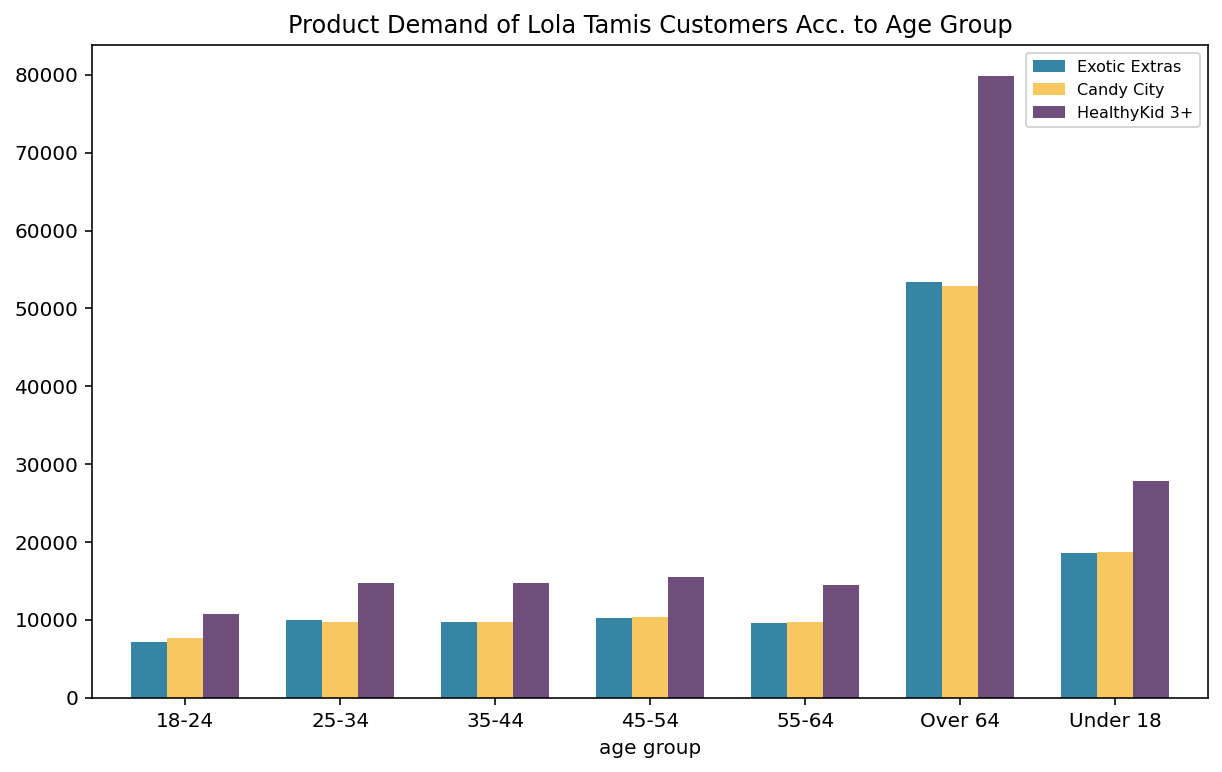

In [40]:
product_demand_per_brand_age.plot.bar(rot=0,width=0.7, color=colors_list)
plt.title("Product Demand of Lola Tamis Customers Acc. to Age Group")
plt.legend(prop={'size': 8})
plt.show()

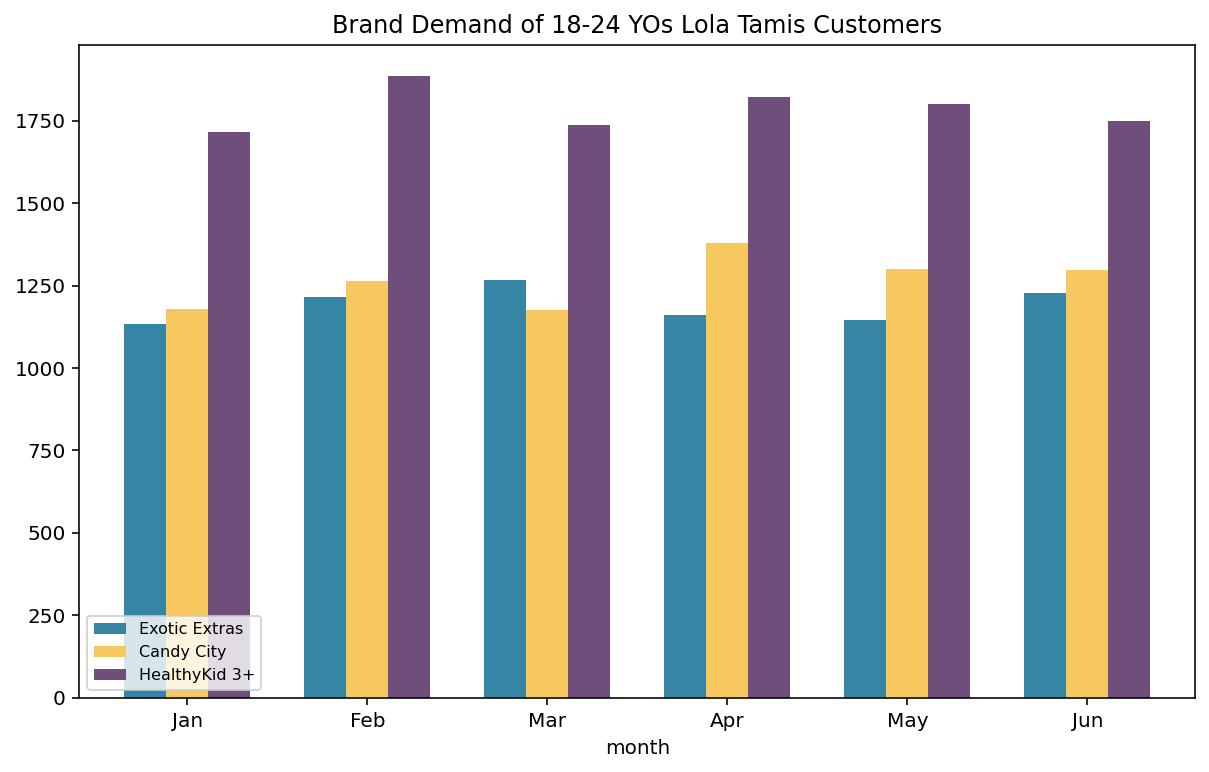

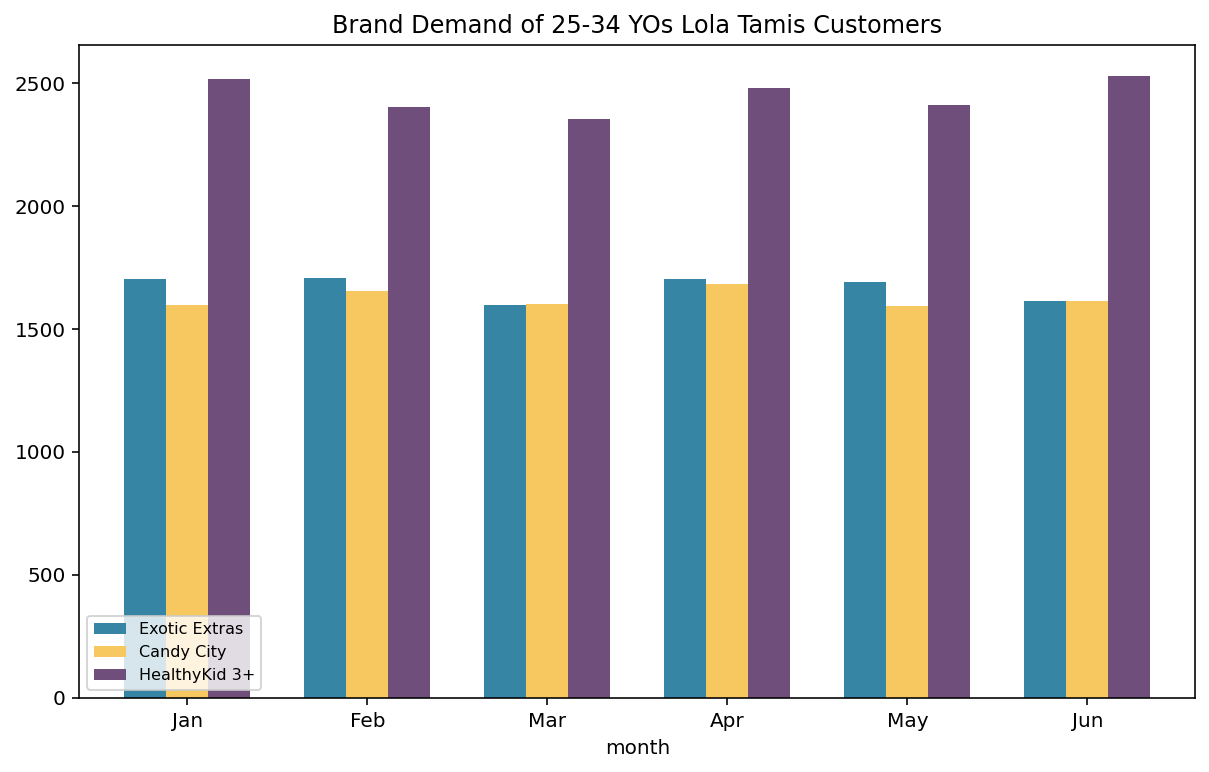

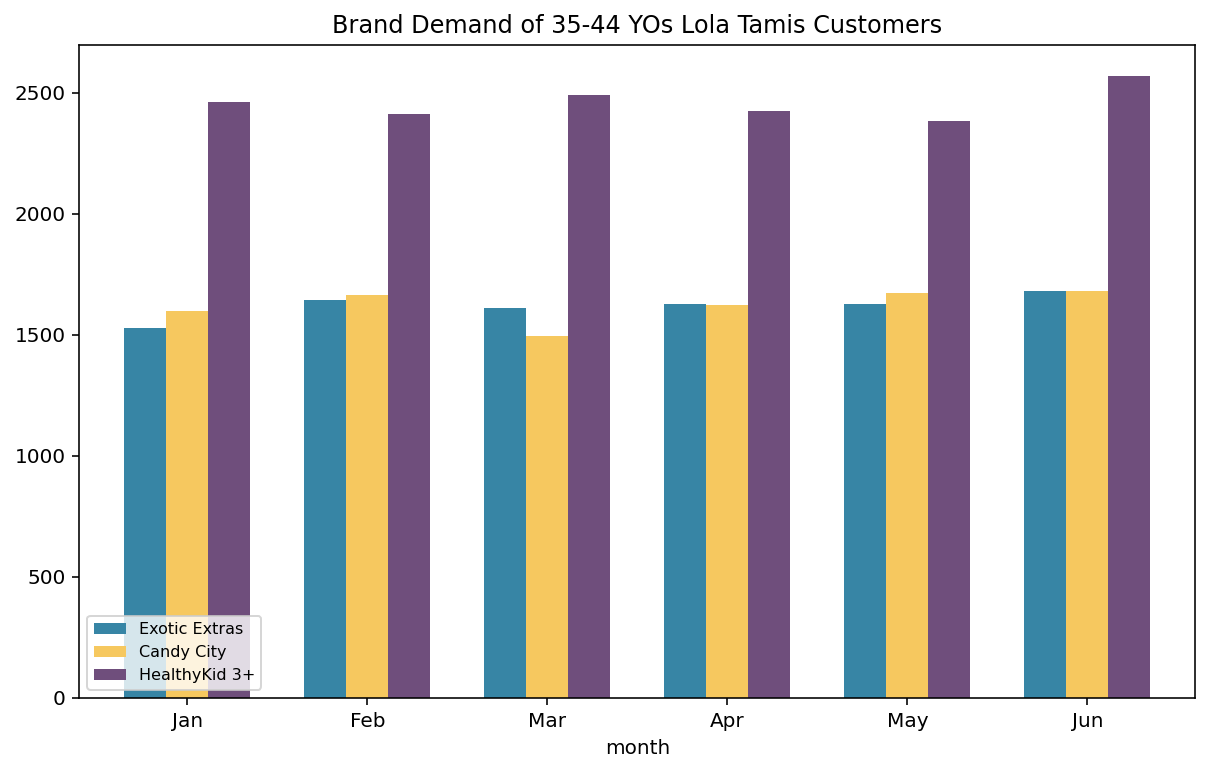

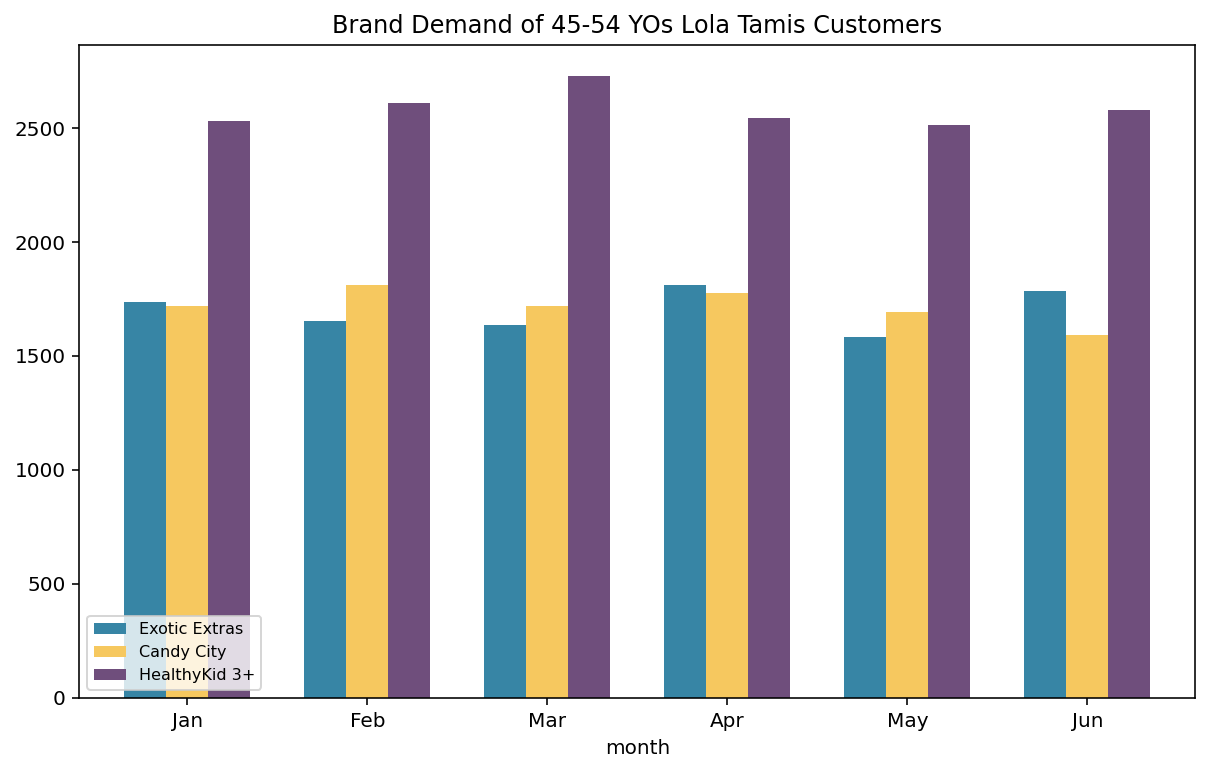

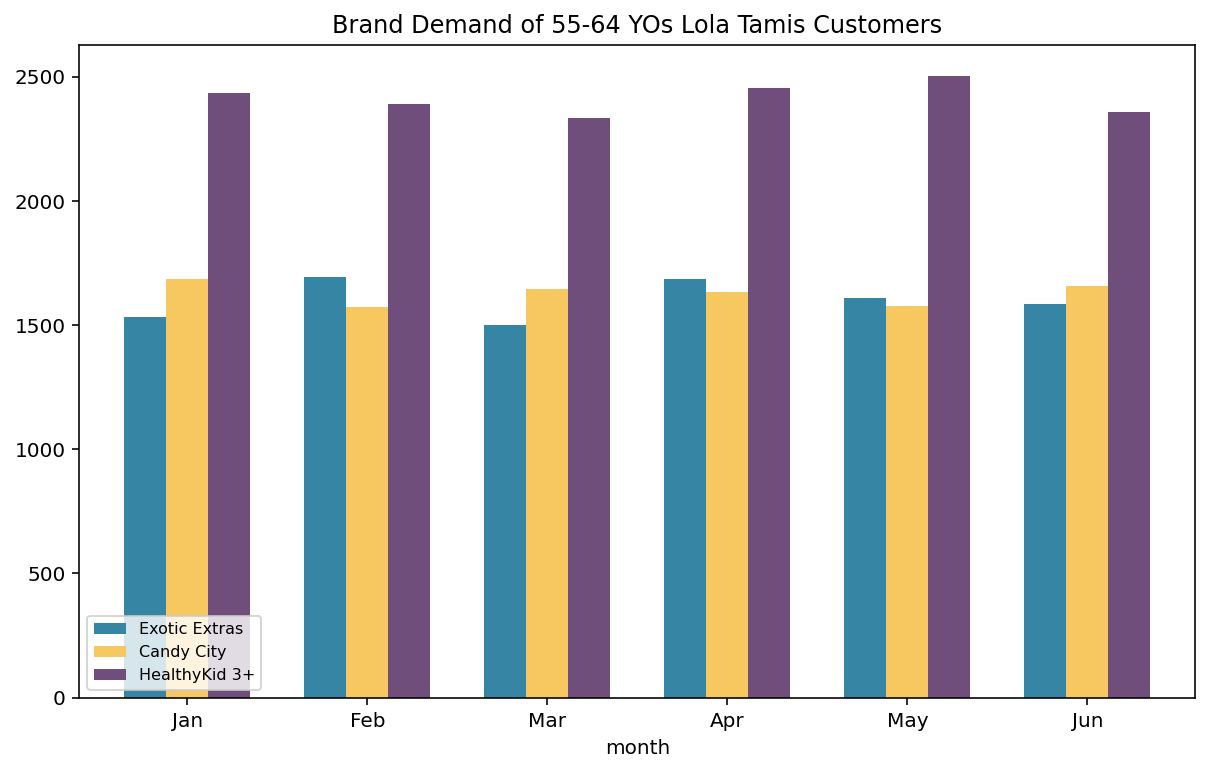

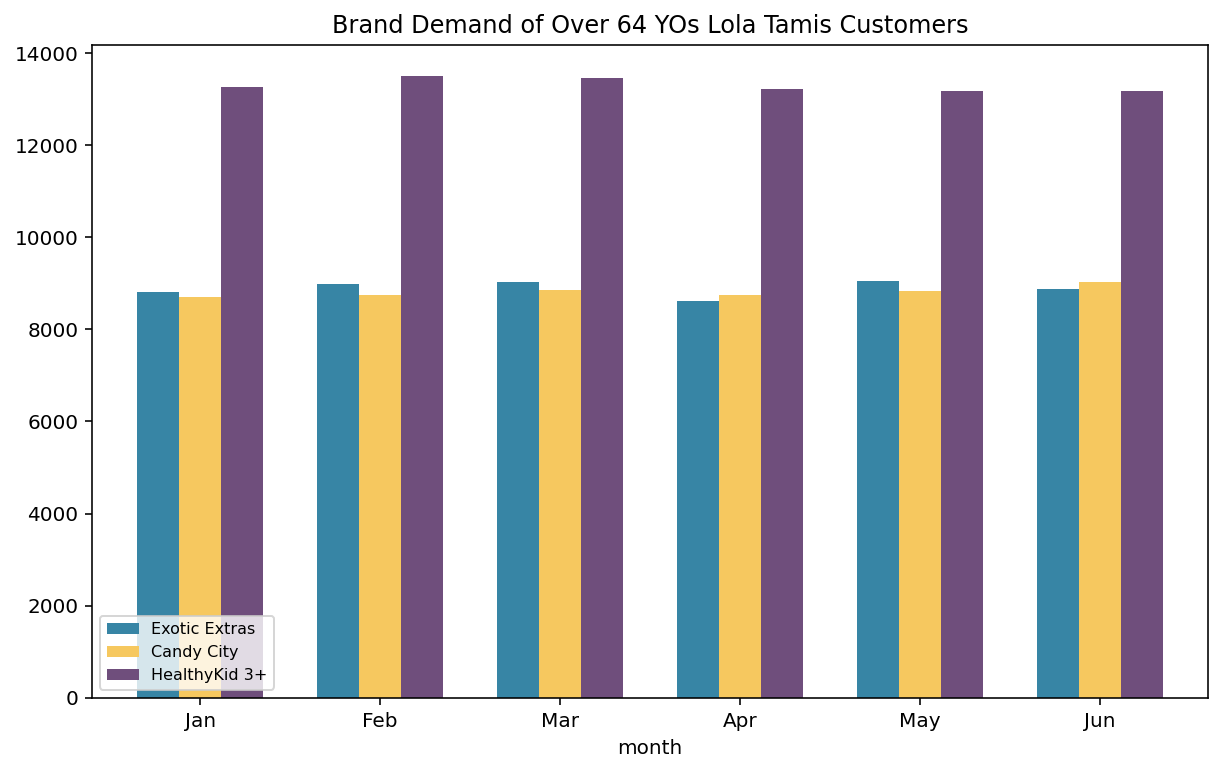

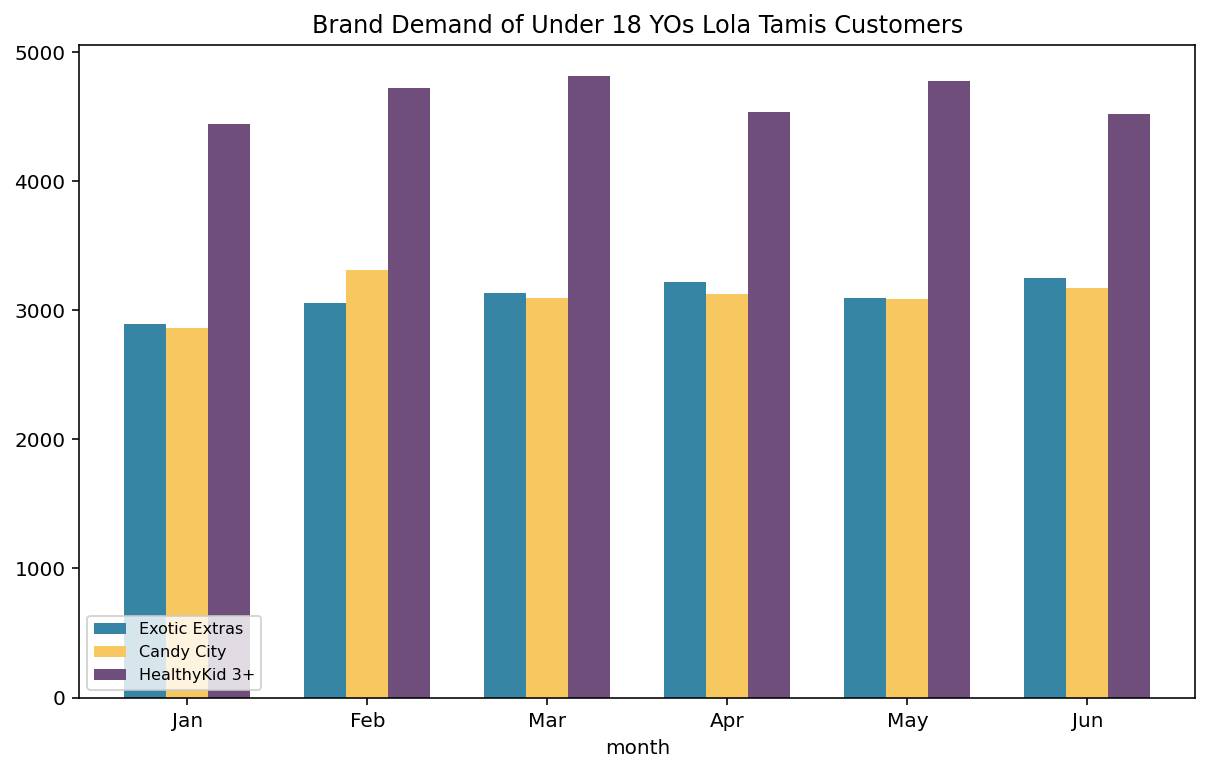

In [41]:
for age_group_count in range(len(age_groups_list)):
    product_demand_per_brand_age_month.loc[age_groups_list[age_group_count]].plot.bar(width=0.7, color=colors_list, rot=0)
    plt.subplot().set_xticklabels(month_list) 
    plt.legend(loc='lower left',prop={'size': 8})
    plt.title("Brand Demand of " + age_groups_list[age_group_count] + " YOs Lola Tamis Customers")
    plt.show()

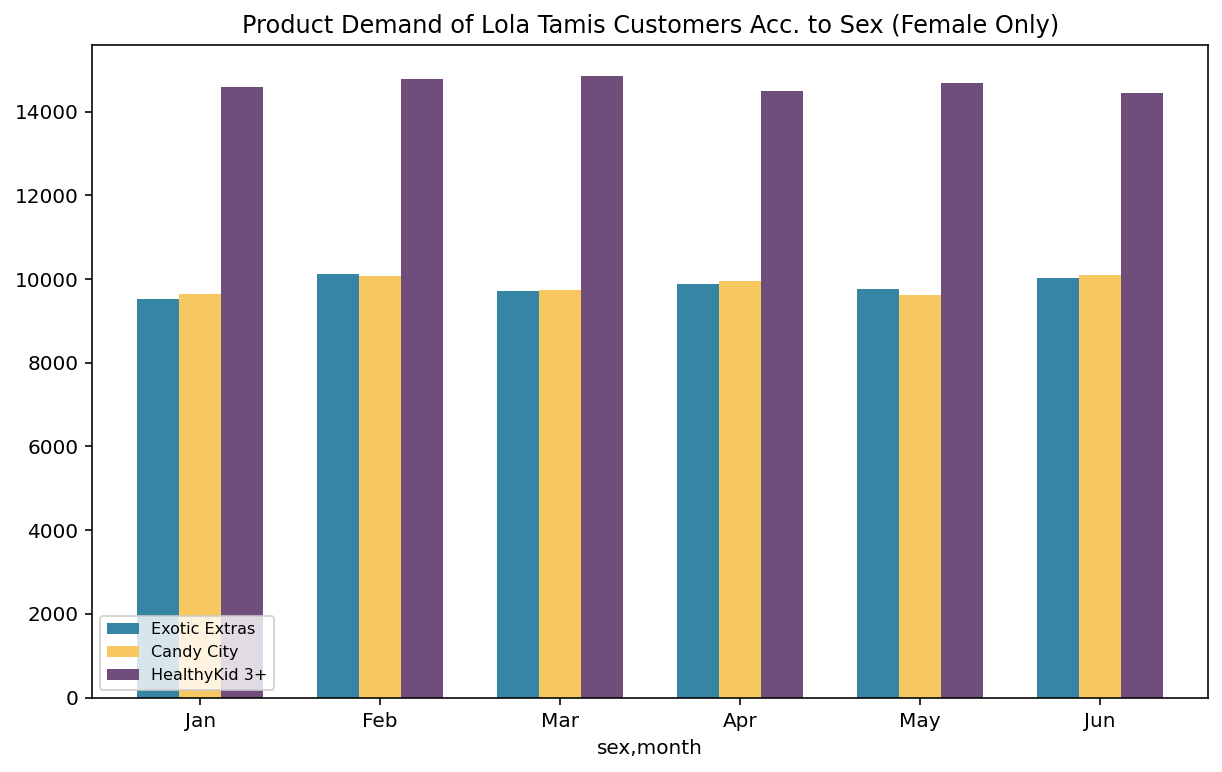

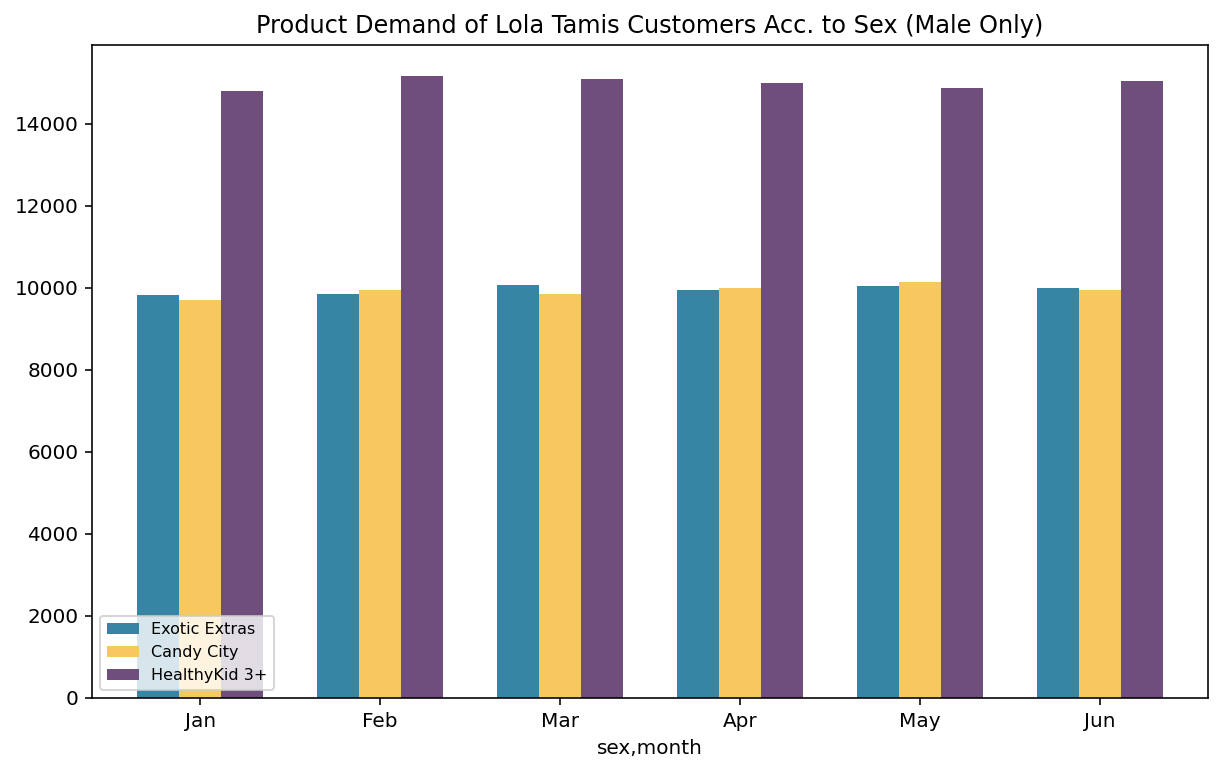

In [42]:
product_demand_per_brand_sex.loc[['F']].plot.bar(rot=0,width=0.7, color=colors_list)
plt.subplot().set_xticklabels(month_list)
plt.title("Product Demand of Lola Tamis Customers Acc. to Sex (Female Only)")
plt.legend(loc='lower left',prop={'size': 8})
plt.show()

product_demand_per_brand_sex.loc[['M']].plot.bar(rot=0,width=0.7, color=colors_list)
plt.subplot().set_xticklabels(month_list)
plt.title("Product Demand of Lola Tamis Customers Acc. to Sex (Male Only)")
plt.legend(loc='lower left',prop={'size': 8})
plt.show()

## Breakdown of Customer Retention Data

In [43]:
# Creating a new DataFrame (customers_per_month_df) to fit client demands

customers_per_month_df = transaction_df.groupby('month')['username'].count().reset_index().T.drop('month').set_axis(month_list, axis='columns')
customers_per_month_df.rename(index = {"username": "total customers"}, inplace = True)

In [44]:
# Creating another DataFrame (customers_for_month_df) to show the customers for every month and creating a list of list of unique usernames 
# for every month using customers_for_month_df

customers_for_month_df = transaction_df.set_index(['month', transaction_df.groupby('month').cumcount()+1])['username'].unstack().add_prefix(
    'Column').set_axis(month_list, axis='rows').T

customer_list = [list(customers_for_month_df[month_list[0]].unique()),list(customers_for_month_df[month_list[1]].unique()),
             list(customers_for_month_df[month_list[2]].unique()),list(customers_for_month_df[month_list[3]].unique()),
             list(customers_for_month_df[month_list[4]].unique()),list(customers_for_month_df[month_list[5]].unique())]

### New customers: customers with no purchase history but purchase for the current month

In [45]:
# Creating a list with the number of new customers every month using a counter (new_customer_list)

new_customer_list=[0,0,0,0,0,0]
all_customers = []

# in each month, if the username of the customer is in the list of unique customers for the month 
# but not in the list of "all customers"
# then they are counted as having no purchase history

# numpy src: https://www.geeksforgeeks.org/python-get-unique-values-list/
    # src: https://stackoverflow.com/questions/25220975/find-the-non-intersecting-values-of-two-arrays

for new_customer_month_index in range(len(month_list)):
    new_customer_list[new_customer_month_index] = len(customer_list[new_customer_month_index]) - len(np.intersect1d(all_customers,customer_list[new_customer_month_index]))
    all_customers += customer_list[new_customer_month_index]
    new_customer_month_index += 1

In [46]:
# Adding the list to the customers_per_month_df DataFrame

customers_per_month_df.loc['new customer'] = new_customer_list

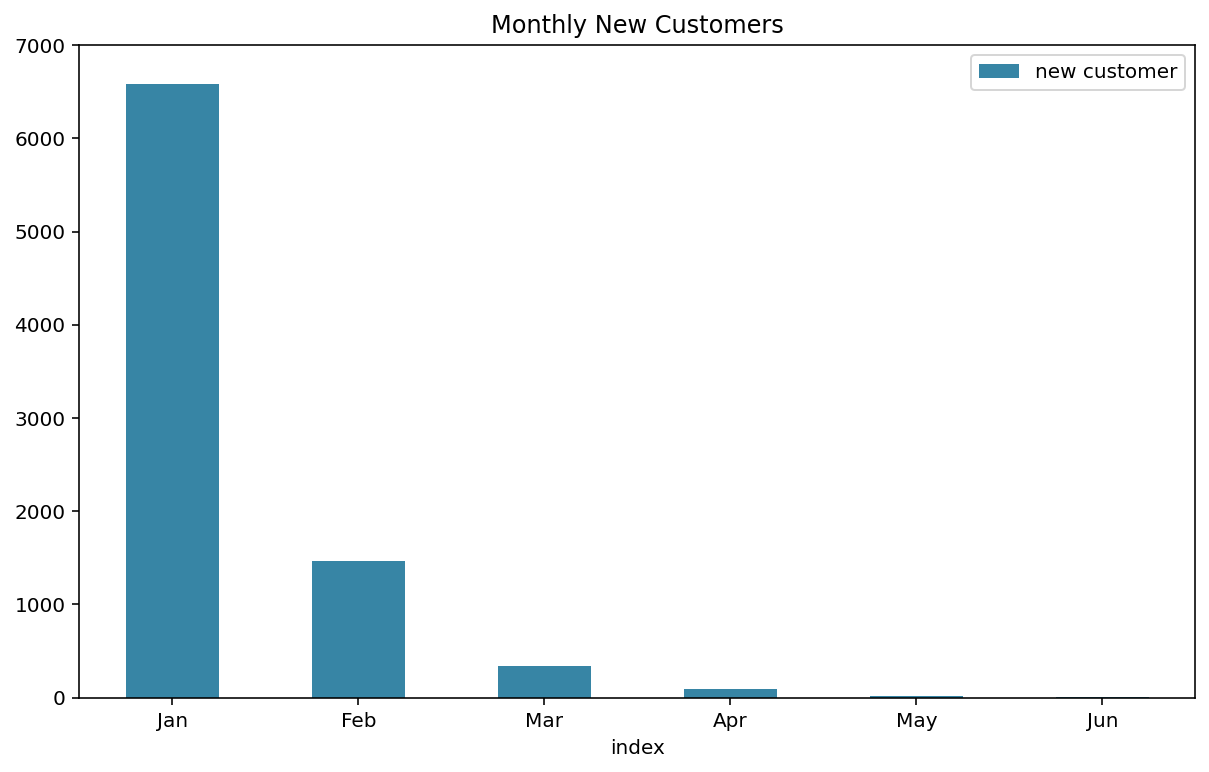

In [47]:
customers_per_month_df.T.reset_index().plot.bar(x="index", y="new customer", color=colors_list[0], rot=0)
plt.title("Monthly New Customers")
plt.ylim(top=7000)
plt.show()

In [48]:
# .cumsum() src: https://datagy.io/pandas-cumulative-sum/

# getting the cumulative monthly total users to use for seeing the customer retention rate

total_customers_list = customers_per_month_df.T['new customer'].cumsum()

customers_per_month_df.loc['total customers'] = total_customers_list

### Repeaters: customers from the current month who also purchased in the previous month

In [49]:
# Creating a list with the number of repeaters every month using a counter (repeaters_list)

repeaters_list=[0,0,0,0,0,0]
monthly_customers = []

# in each month, if the username of the customer is in the list of unique customers for the month 
# and in the list of unique customers from the month before,
# then they are counted as repeaters

for repeaters_month_index in range(len(month_list)):
    repeaters_list[repeaters_month_index] = len(np.intersect1d(monthly_customers,customer_list[repeaters_month_index]))
    monthly_customers = customer_list[repeaters_month_index]
    repeaters_month_index += 1

In [50]:
# Adding the list to the customers_per_month_df DataFrame

customers_per_month_df.loc['repeaters'] = repeaters_list

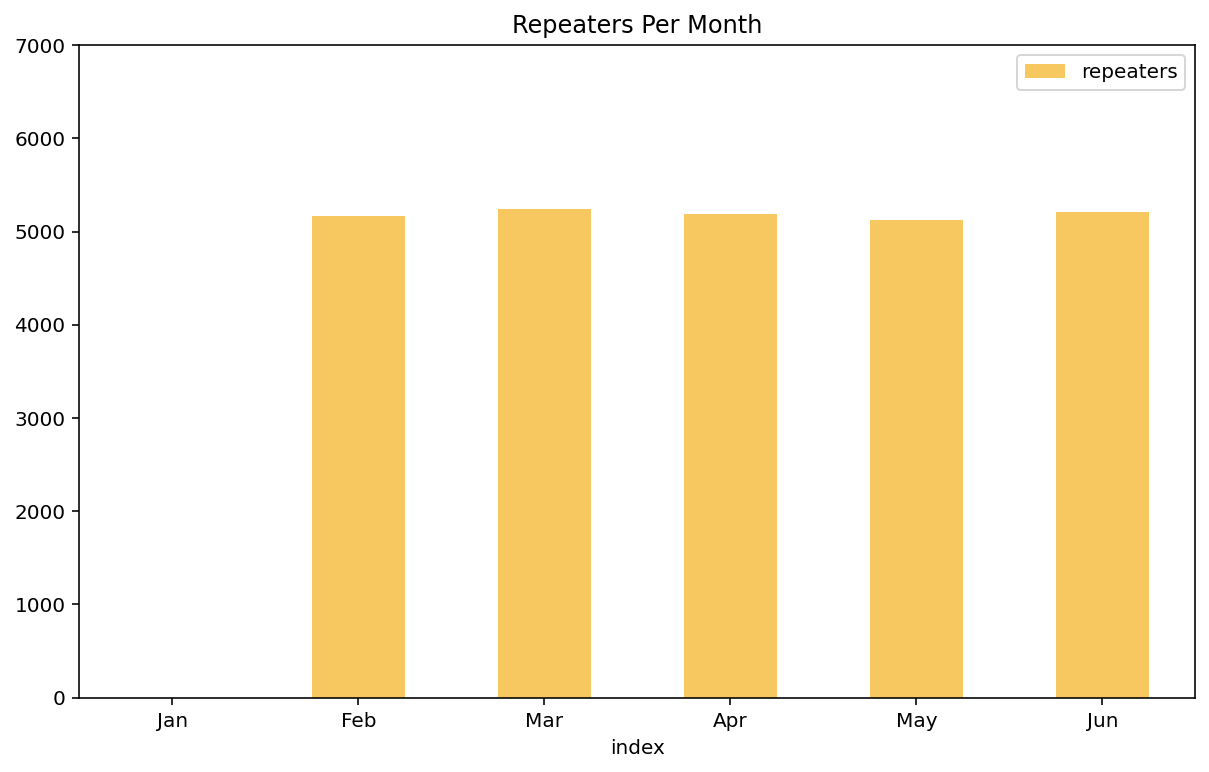

In [51]:
customers_per_month_df.T.reset_index().plot.bar(x="index", y="repeaters", color=colors_list[1], rot=0)
plt.title("Repeaters Per Month")
plt.ylim(top=7000)
plt.show()

### Inactive: the number of customers in the total set of transactions up to and including the current month who have purchase history but do not have a purchase for the current month

In [52]:
# Creating a list with the number of inactive customers every month using a counter (inactive_list)

inactive_list=[0,0,0,0,0,0]
all_customers = []

# in each month, the customers from last month are added to the list of all customers who have purchased
# if the username of the customer is in this list for the month 
# but not in the list of unique customers from the current month ,
# then they are counted as inactive

for inactive_month_index in range(len(month_list)):
    all_customers_array = np.array(all_customers)
    inactive_list[inactive_month_index] = len(np.unique(all_customers_array)) - len(np.intersect1d(all_customers,customer_list[inactive_month_index]))
    all_customers += customer_list[inactive_month_index]
    inactive_month_index += 1

In [53]:
# Adding the list to the customers_per_month_df DataFrame

customers_per_month_df.loc['inactive'] = inactive_list

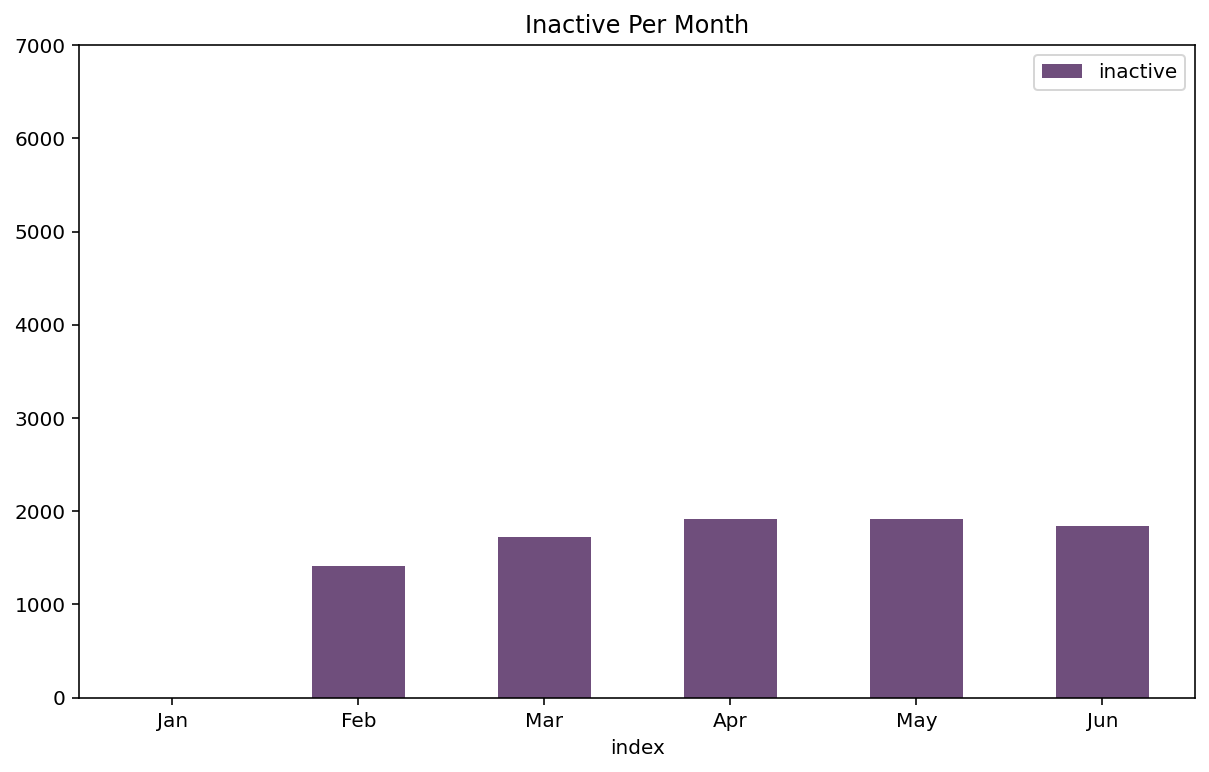

In [54]:
customers_per_month_df.T.reset_index().plot.bar(x="index", y="inactive", color=colors_list[2], rot=0)
plt.title("Inactive Per Month")
plt.ylim(top=7000)
plt.show()

### Engaged: the number of customers in the total set of transactions up to and including the current month who have consistently purchased every single month

In [55]:
# Creating a list with the number of inactive customers every month using a counter (inactive_list)

engaged_list=[0,0,0,0,0,0]
monthly_customers = customer_list[0]

# in each month, if the username of the customer is in the list of unique customers for the month 
# as long as their unique name appears in the list from last month and every month before index reaches 0,
# then they are counted as engaged

for engaged_month_index in range(len(month_list)):
    engaged_list[engaged_month_index] = len(np.intersect1d(monthly_customers,customer_list[engaged_month_index]))
    monthly_customers = np.intersect1d(monthly_customers,customer_list[engaged_month_index])
    engaged_month_index += 1

In [56]:
# Adding the list to the customers_per_month_df DataFrame

customers_per_month_df.loc['engaged'] = engaged_list

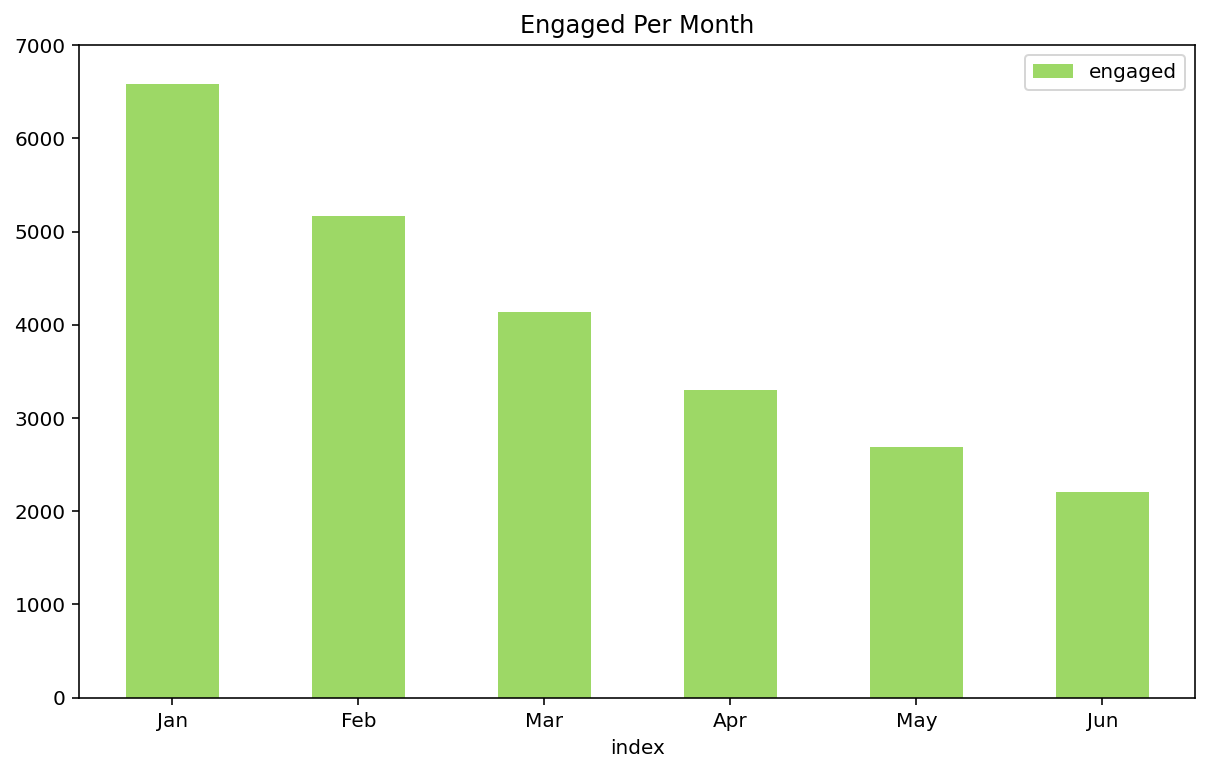

In [57]:
customers_per_month_df.T.reset_index().plot.bar(x="index", y="engaged", color=colors_list[3], rot=0)
plt.title("Engaged Per Month")
plt.ylim(top=7000)
plt.show()

### Final Tally

In [58]:
customers_per_month_df.style.set_caption("Customer Retention Data Tally").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Jan,Feb,Mar,Apr,May,Jun
total customers,6584,8047,8387,8481,8503,8506
new customer,6584,1463,340,94,22,3
repeaters,0,5167,5239,5192,5127,5209
inactive,0,1417,1728,1912,1915,1840
engaged,6584,5167,4141,3304,2685,2210


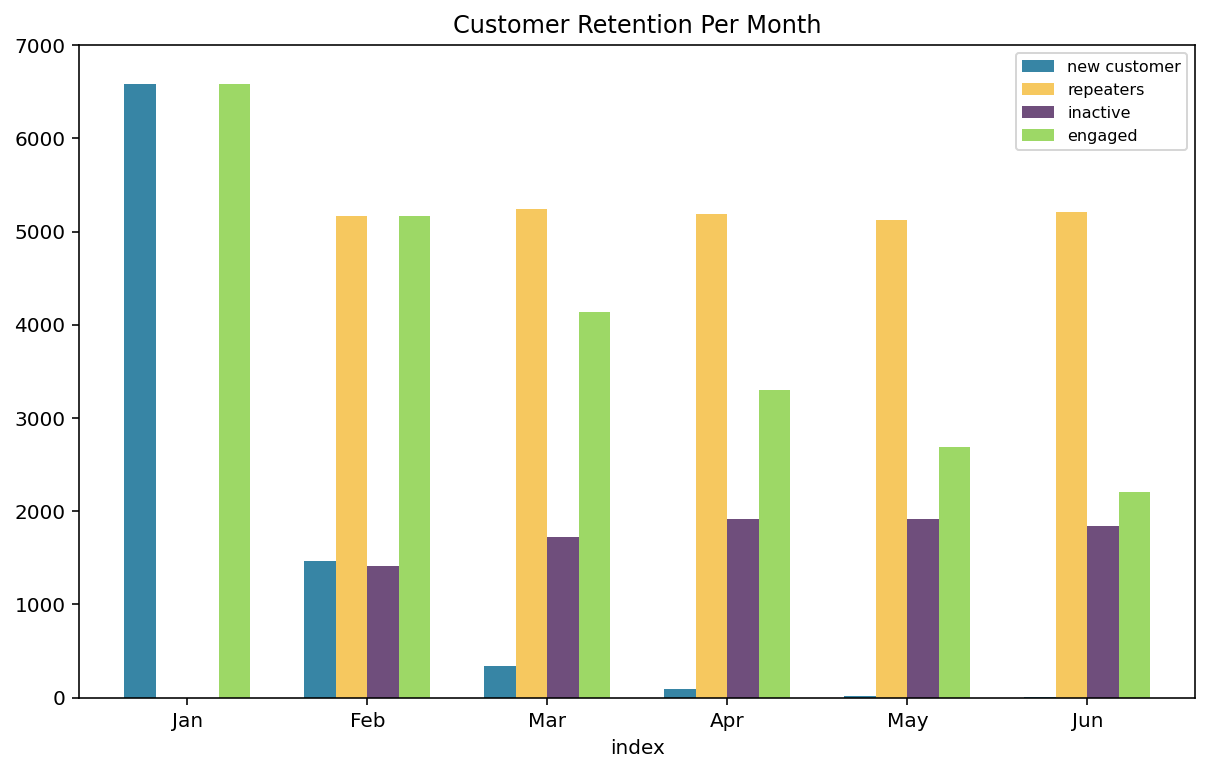

In [59]:
customers_per_month_df.iloc[1:].T.reset_index().plot.bar(x="index", rot=0, width = 0.7, color=colors_list)
plt.title("Customer Retention Per Month")
plt.legend(prop={'size': 8})
plt.ylim(top=7000)
plt.show()

In [60]:
CPM_percent_df = customers_per_month_df.T.copy()

# calculating percent src: https://www.geeksforgeeks.org/how-to-calculate-the-percentage-of-a-column-in-pandas/
                    # src: https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas

CPM_percent_df['new customer'] = round(((CPM_percent_df['new customer'] / CPM_percent_df['total customers']) * 100),2).astype(str) + ' %'
CPM_percent_df['repeaters'] = round(((CPM_percent_df['repeaters'] / CPM_percent_df['total customers']) * 100),2).astype(str) + ' %'
CPM_percent_df['inactive'] = round(((CPM_percent_df['inactive'] / CPM_percent_df['total customers']) * 100),2).astype(str) + ' %'
CPM_percent_df['engaged'] = round(((CPM_percent_df['engaged'] / CPM_percent_df['total customers']) * 100),2).astype(str) + ' %'

del CPM_percent_df['total customers']

CPM_percent_df.T.style.set_caption("Customer Retention Rate in Percent").set_table_styles([{
    'selector': '','props': [('border', '0.5px black solid !important')]},{
    'selector': 'caption', 'props': [('font-size', '15px'),
    ]}])

,Jan,Feb,Mar,Apr,May,Jun
new customer,100.0 %,18.18 %,4.05 %,1.11 %,0.26 %,0.04 %
repeaters,0.0 %,64.21 %,62.47 %,61.22 %,60.3 %,61.24 %
inactive,0.0 %,17.61 %,20.6 %,22.54 %,22.52 %,21.63 %
engaged,100.0 %,64.21 %,49.37 %,38.96 %,31.58 %,25.98 %
